### Import Libraries

In [450]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
#import researchpy as rp 
# can't use researchpy since it's not a module here
import scipy.stats as stats
from scipy.stats import norm
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from numpy.polynomial import Polynomial as P

### Read Data

In [340]:
EngNightData = pd.read_csv('EnginFriNight.csv')
EngNoonData = pd.read_csv('EnginLibNoon.csv')
EtchNightData = pd.read_csv('EtchFriNight.csv')
EtchNoonData = pd.read_csv('EtchFri.csv')
HearstNightData = pd.read_csv('HearstFriNight.csv')
HearstNoonData = pd.read_csv('HearstNoon.csv')
MoffittNightData = pd.read_csv('MoffittFriNight.csv')
MoffittNoonData = pd.read_csv('MoffittNoon.csv')

### Print Data

In [341]:
EngNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639162e+09,15.097266,1012.370649,40.313798,0,0,0,0,0.0
1,1.639162e+09,15.122852,1012.407977,40.313753,0,0,0,0,0.0
2,1.639162e+09,15.138281,1012.378402,40.241664,0,0,0,0,0.0
3,1.639162e+09,15.164062,1012.420082,40.169518,0,0,0,1,12.0
4,1.639162e+09,15.179492,1012.405994,40.163499,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639163e+09,13.426953,1012.854735,43.605425,0,0,0,0,0.0
114,1.639163e+09,13.385938,1012.888483,43.748593,0,0,0,0,0.0
115,1.639163e+09,13.411523,1012.855632,43.898051,0,0,0,0,0.0
116,1.639163e+09,13.432227,1012.866961,43.898121,0,0,0,0,0.0


In [342]:
EngNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639169e+09,15.343945,1011.964217,43.598320,3,5,7,0,0.0
1,1.639169e+09,15.405469,1011.926216,43.484601,3,5,7,0,0.0
2,1.639169e+09,15.436328,1011.812480,43.268618,3,5,7,1,12.0
3,1.639169e+09,15.508398,1011.939238,43.142775,3,5,7,0,0.0
4,1.639169e+09,15.569922,1012.002058,42.980867,3,5,7,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639170e+09,18.725391,1011.641296,38.522657,3,5,7,0,0.0
114,1.639170e+09,18.709961,1011.499532,37.947187,3,5,7,0,0.0
115,1.639170e+09,18.725391,1011.348339,37.910741,3,5,7,0,0.0
116,1.639170e+09,18.725391,1011.086970,38.455936,3,5,7,0,0.0


In [343]:
EtchNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639161e+09,17.923828,1011.970535,34.329350,0,0,0,0,0.0
1,1.639161e+09,17.980273,1011.900763,34.074148,0,0,0,3,36.0
2,1.639161e+09,17.954492,1011.963816,34.098910,0,0,0,0,0.0
3,1.639161e+09,18.000781,1011.943845,33.988999,0,0,0,0,0.0
4,1.639161e+09,17.969922,1011.959632,33.922933,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639161e+09,15.909180,1012.050248,38.000875,0,0,0,0,0.0
114,1.639161e+09,15.878320,1012.087427,38.193787,0,0,0,0,0.0
115,1.639161e+09,15.842383,1012.054787,38.085588,0,0,0,0,0.0
116,1.639161e+09,15.847461,1012.078013,37.904958,0,0,0,1,12.0


In [344]:
EtchNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639160e+09,19.249609,1010.813316,24.215981,0,0,0,0,0.0
1,1.639160e+09,19.290820,1010.841058,24.245607,0,0,0,0,0.0
2,1.639160e+09,19.249609,1010.818919,24.186152,0,0,0,0,0.0
3,1.639160e+09,19.239453,1010.852279,24.229411,0,0,0,11,132.0
4,1.639160e+09,19.244531,1010.840612,24.089740,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639160e+09,18.288672,1011.264350,26.861897,0,0,0,0,0.0
114,1.639160e+09,18.293750,1011.313282,27.268913,0,0,0,2,24.0
115,1.639160e+09,18.278320,1011.374336,27.566595,0,0,0,0,0.0
116,1.639160e+09,18.324609,1011.513620,27.662240,0,0,0,0,0.0


In [345]:
HearstNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639163e+09,14.295508,1012.494478,41.567923,0,0,0,0,0.0
1,1.639163e+09,14.331445,1012.478192,41.591903,0,0,0,0,0.0
2,1.639163e+09,14.346875,1012.520757,41.621894,0,0,0,0,0.0
3,1.639163e+09,14.346875,1012.508148,41.669846,0,0,0,0,0.0
4,1.639163e+09,14.351953,1012.467347,41.627898,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...
113,1.639163e+09,15.549414,1012.422098,38.923879,0,0,0,0,0.0
114,1.639163e+09,15.575195,1012.427804,38.893695,0,0,0,0,0.0
115,1.639163e+09,15.600781,1012.432673,38.917695,0,0,0,0,0.0
116,1.639163e+09,15.616211,1012.423156,38.731033,0,0,0,1,12.0


In [346]:
HearstNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639169e+09,17.625586,1011.318308,38.820983,7168,512,1024,1,12.0
1,1.639169e+09,17.759375,1011.312829,38.596272,7168,512,1024,5,60.0
2,1.639169e+09,17.872266,1011.338240,38.244869,7168,512,1024,1,12.0
3,1.639169e+09,17.975195,1011.322467,37.778340,7168,512,1024,0,0.0
4,1.639169e+09,18.067578,1011.278361,37.729187,7168,512,1024,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639169e+09,15.539258,1011.165017,43.154936,7168,512,1024,0,0.0
114,1.639169e+09,15.513477,1011.148710,43.028683,7168,512,1024,0,0.0
115,1.639169e+09,15.533984,1011.144946,43.377087,7168,512,1024,0,0.0
116,1.639169e+09,15.564844,1011.120958,43.533436,7168,512,1024,0,0.0


In [347]:
MoffittNightData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639164e+09,14.788867,1014.782305,38.753871,0,0,0,0,0.0
1,1.639164e+09,14.804297,1014.799045,38.765735,0,0,0,0,0.0
2,1.639164e+09,14.799219,1014.775144,38.597743,0,0,0,0,0.0
3,1.639164e+09,14.768359,1014.784735,38.669939,0,0,0,1,12.0
4,1.639164e+09,14.809375,1014.778319,38.639711,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639165e+09,14.429102,1014.664468,40.369093,0,0,0,0,0.0
114,1.639165e+09,14.434180,1014.662804,40.500985,0,0,0,0,0.0
115,1.639165e+09,14.454883,1014.617563,40.297064,0,0,0,0,0.0
116,1.639165e+09,14.470313,1014.647766,40.063190,0,0,0,0,0.0


In [348]:
MoffittNoonData

,Time,Temperature,Pressure,Humidity,PM 1,PM 2.5,PM 10,Counts within Interval,CPM within Interval
0,1.639171e+09,16.993555,1012.947821,41.014551,2560,1792,0,0,0.0
1,1.639171e+09,17.008984,1012.924681,40.743161,2560,1792,0,6,72.0
2,1.639171e+09,17.029492,1012.898403,40.604406,2560,1792,0,1,12.0
3,1.639171e+09,17.050000,1012.914332,40.435502,2560,1792,0,1,12.0
4,1.639171e+09,17.039844,1012.918803,40.332992,2560,1792,0,0,0.0
...,...,...,...,...,...,...,...,...,...
113,1.639171e+09,16.160937,1013.275306,39.998272,2560,1792,0,0,0.0
114,1.639171e+09,16.119922,1013.272287,39.793696,2560,1792,0,1,12.0
115,1.639171e+09,16.109570,1013.269436,39.209825,2560,1792,0,0,0.0
116,1.639171e+09,16.135352,1013.223021,38.571192,2560,1792,0,0,0.0


### Plot Radiation Data for Both Noon and Night Times at Each Location to See if Consistent

#### Engineering Library

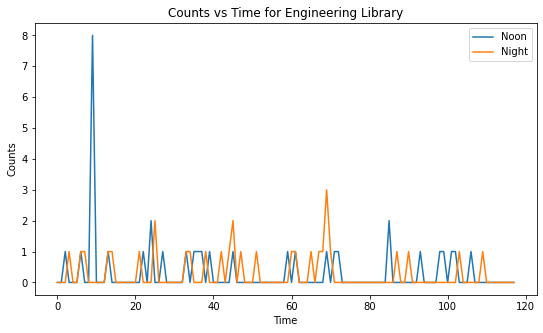

<Figure size 1080x1080 with 0 Axes>

In [349]:
plt.plot(EngNoonData["Counts within Interval"],label = "Noon")
plt.plot(EngNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Engineering Library")    
plt.figure(figsize=(15, 15))
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### Etcheverry Hall

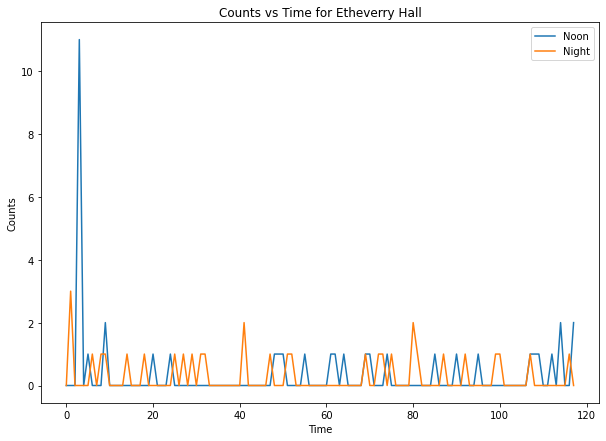

In [350]:
plt.plot(EtchNoonData["Counts within Interval"],label = "Noon")
plt.plot(EtchNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Etheverry Hall")  
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

##### Hearst Mining Building

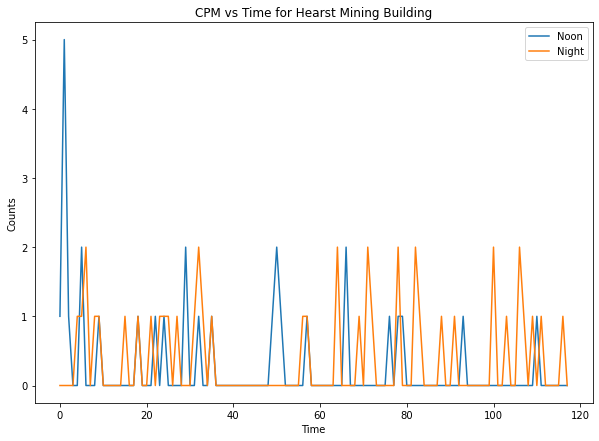

In [351]:
plt.plot(HearstNoonData["Counts within Interval"],label = "Noon")
plt.plot(HearstNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("CPM vs Time for Hearst Mining Building")  
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### Moffitt Library

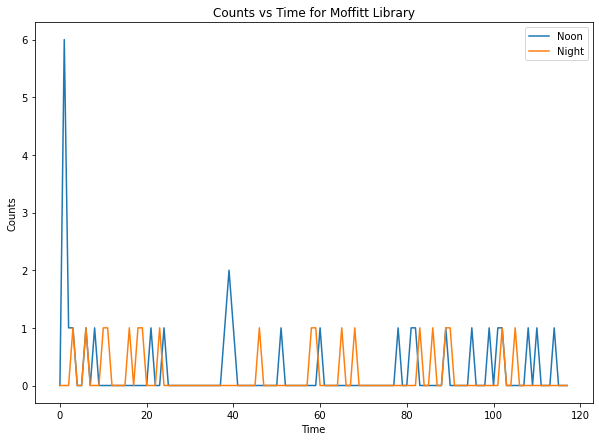

In [352]:
plt.plot(MoffittNoonData["Counts within Interval"],label = "Noon")
plt.plot(MoffittNightData["Counts within Interval"],label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time for Moffitt Library") 
display.display(plt.gcf())
display.clear_output(wait=True)
plt.show()
plt.rcParams['figure.figsize'] = [10,7]

#### All Libraries

In [353]:
mean_eng_noon = np.mean(EngNoonData["Counts within Interval"])
mean_etch_noon = np.mean(EtchNoonData["Counts within Interval"])
mean_hearst_noon = np.mean(HearstNoonData["Counts within Interval"])
mean_moffitt_noon = np.mean(MoffittNoonData["Counts within Interval"])
mean_eng_night = np.mean(EngNightData["Counts within Interval"])
mean_etch_night = np.mean(EtchNightData["Counts within Interval"])
mean_hearst_night = np.mean(HearstNightData["Counts within Interval"])
mean_moffitt_night = np.mean(MoffittNightData["Counts within Interval"])

means_noon = [mean_eng_noon,mean_etch_noon,mean_hearst_noon,mean_moffitt_noon]
means_night = [mean_eng_night,mean_etch_night,mean_hearst_night,mean_moffitt_night]

print('The mean number of counts detected at the Engineering library was ' + str(mean_eng_noon) + " and " + str(mean_eng_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at Etcheverry Hall was ' + str(mean_etch_noon) + " and " + str(mean_etch_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at the Hearst Mining Building was ' + str(mean_hearst_noon) + " and " + str(mean_hearst_night) + " counts at noon and night time, respectively.")
print('The mean number of counts detected at Moffitt library was ' + str(mean_moffitt_noon) + " and " + str(mean_moffitt_night) + " counts at noon and night time, respectively.")

The mean number of counts detected at the Engineering library was 0.288135593220339 and 0.2542372881355932 counts at noon and night time, respectively.
The mean number of counts detected at Etcheverry Hall was 0.3135593220338983 and 0.2627118644067797 counts at noon and night time, respectively.
The mean number of counts detected at the Hearst Mining Building was 0.2457627118644068 and 0.3559322033898305 counts at noon and night time, respectively.
The mean number of counts detected at Moffitt library was 0.2457627118644068 and 0.16101694915254236 counts at noon and night time, respectively.


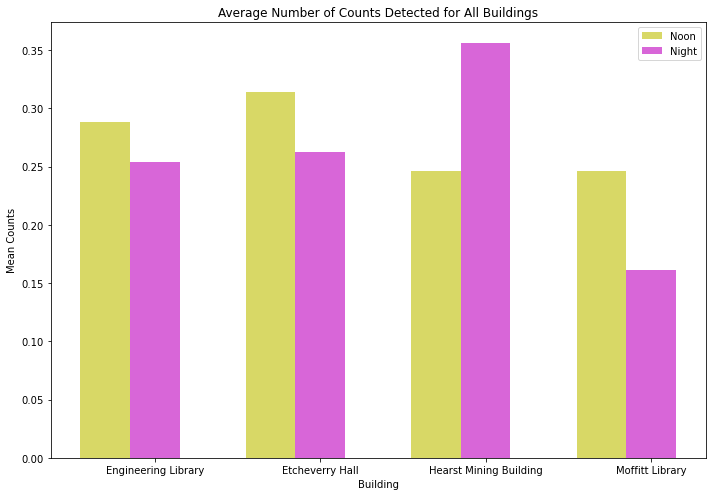

In [354]:
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.3
opacity = 0.6

rects1 = plt.bar(index, means_noon, bar_width,
alpha=opacity,
color='y',
label='Noon')

rects2 = plt.bar(index + bar_width, means_night, bar_width,
alpha=opacity,
color='m',
label='Night')

plt.xlabel('Building')
plt.ylabel('Mean Counts')
plt.title('Average Number of Counts Detected for All Buildings')
plt.xticks(index + bar_width, ('Engineering Library', 'Etcheverry Hall', 'Hearst Mining Building', 'Moffitt Library'))
plt.legend()

plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

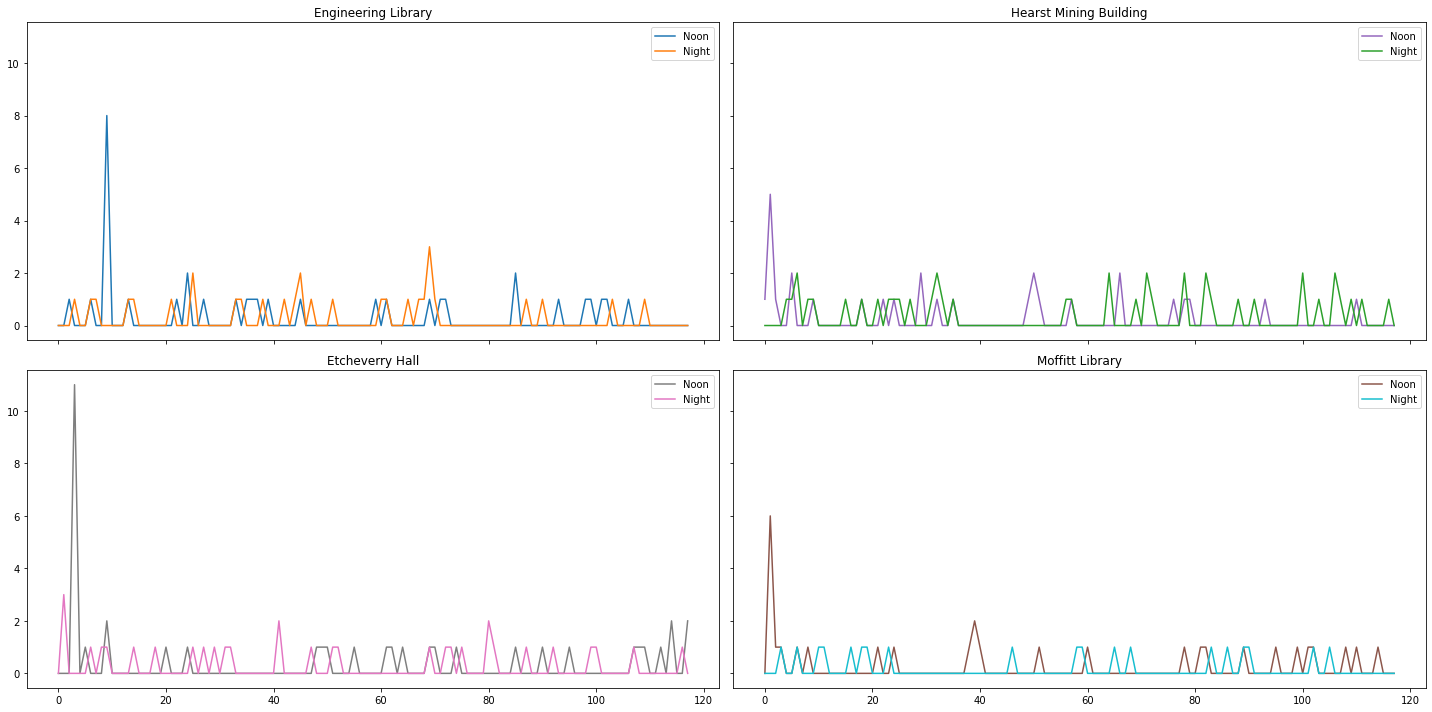

In [355]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].plot(EngNoonData["Counts within Interval"], label = 'Noon')
axs[0, 0].plot(EngNightData["Counts within Interval"], label = 'Night')
axs[0, 0].legend()
axs[0, 0].set_title("Engineering Library")
axs[1, 0].plot(EtchNoonData["Counts within Interval"], 'tab:gray', label = 'Noon')
axs[1, 0].plot(EtchNightData["Counts within Interval"], 'tab:pink', label = 'Night')
axs[1, 0].legend()
axs[1, 0].set_title("Etcheverry Hall") 
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(HearstNoonData["Counts within Interval"], 'tab:purple', label = 'Noon')
axs[0, 1].plot(HearstNightData["Counts within Interval"], 'tab:green', label = 'Night')
axs[0, 1].legend()
axs[0, 1].set_title("Hearst Mining Building")
axs[1, 1].plot(MoffittNoonData["Counts within Interval"], 'tab:brown', label = 'Noon')
axs[1, 1].plot(MoffittNightData["Counts within Interval"], 'tab:cyan', label = 'Night')
axs[1, 1].legend()
axs[1, 1].set_title("Moffitt Library") 
fig.tight_layout()
plt.rcParams['figure.figsize'] = [20, 10]

#### All at Noon

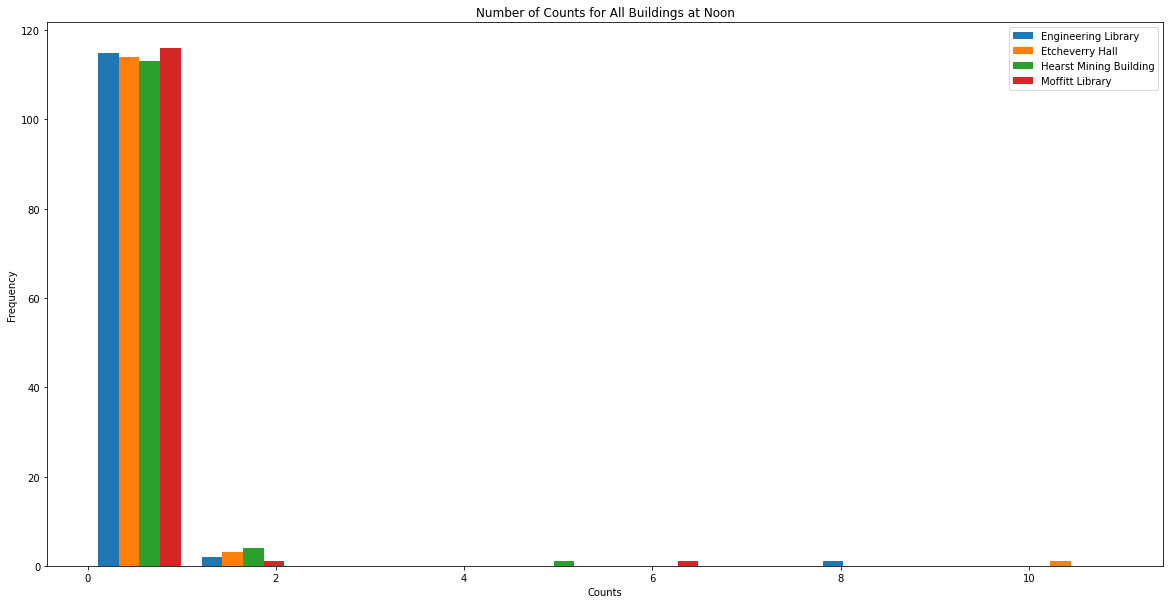

In [356]:
plt.hist([EngNoonData["Counts within Interval"],EtchNoonData["Counts within Interval"],HearstNoonData["Counts within Interval"],MoffittNoonData["Counts within Interval"]],label = ["Engineering Library","Etcheverry Hall","Hearst Mining Building","Moffitt Library"])
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Noon")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

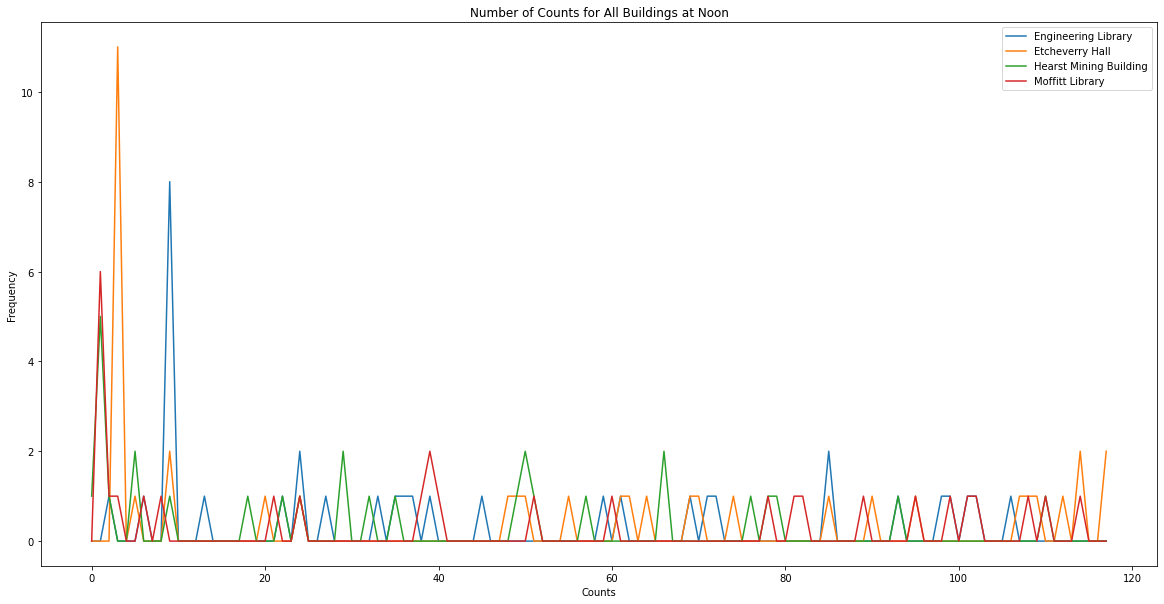

In [357]:
plt.plot(EngNoonData["Counts within Interval"],label = "Engineering Library")
plt.plot(EtchNoonData["Counts within Interval"],label = "Etcheverry Hall")
plt.plot(HearstNoonData["Counts within Interval"],label = "Hearst Mining Building")
plt.plot(MoffittNoonData["Counts within Interval"],label = "Moffitt Library")
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Noon") 
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

#### All at Night

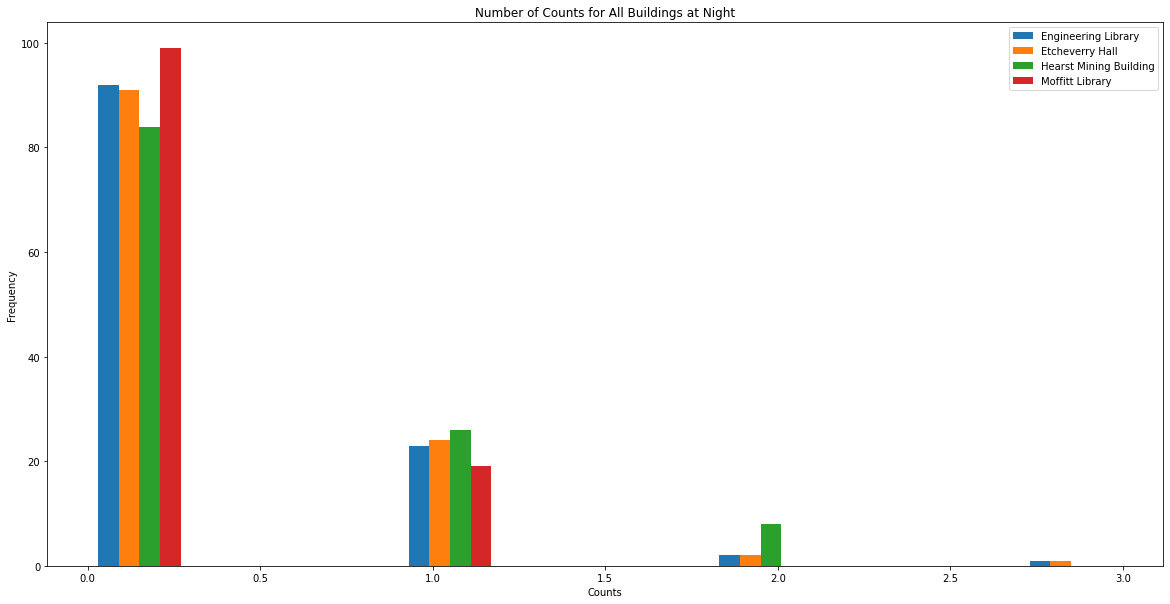

In [358]:
plt.hist([EngNightData["Counts within Interval"],EtchNightData["Counts within Interval"],HearstNightData["Counts within Interval"],MoffittNightData["Counts within Interval"]],label = ["Engineering Library","Etcheverry Hall","Hearst Mining Building","Moffitt Library"])
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Night")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

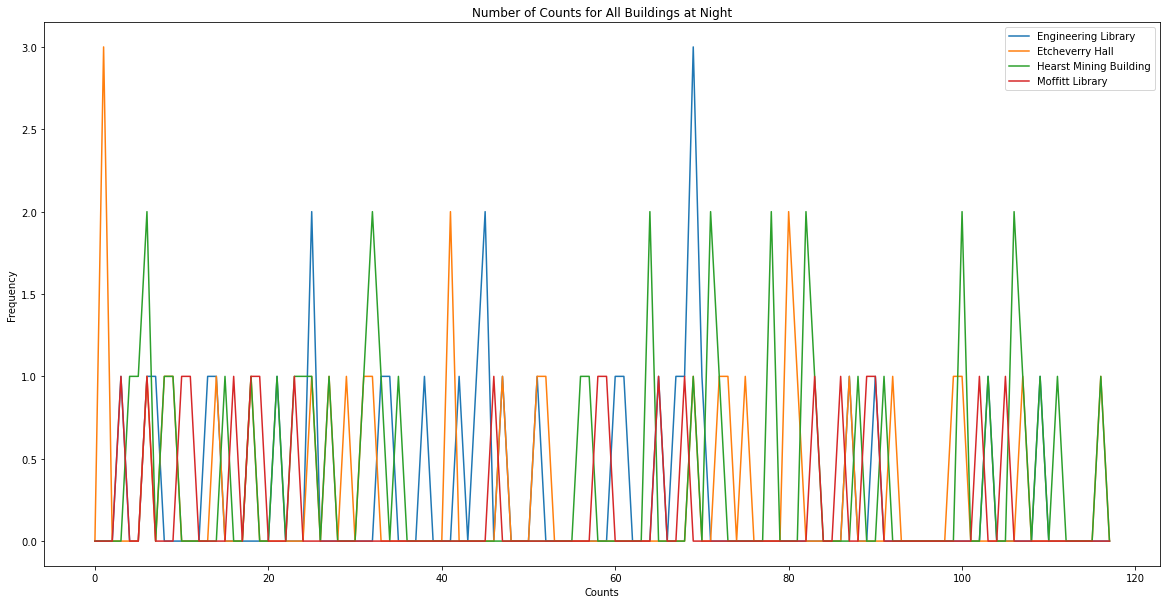

In [359]:
plt.plot(EngNightData["Counts within Interval"],label = "Engineering Library")
plt.plot(EtchNightData["Counts within Interval"],label = "Etcheverry Hall")
plt.plot(HearstNightData["Counts within Interval"],label = "Hearst Mining Building")
plt.plot(MoffittNightData["Counts within Interval"],label = "Moffitt Library")
plt.ylabel('Frequency') 
plt.xlabel('Counts')
plt.legend()                  
plt.title("Number of Counts for All Buildings at Night")   
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

### Plot Radiation vs Temperature Data for Both Noon and Night Times at Each Location

#### Engineering Library

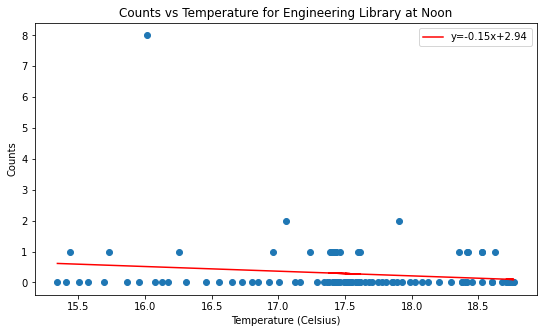

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     2.679
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.104
Time:                            04:52:33   Log-Likelihood:                -146.18
No. Observations:                     118   AIC:                             296.4
Df Residuals:                         116   BIC:                             301.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [399]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

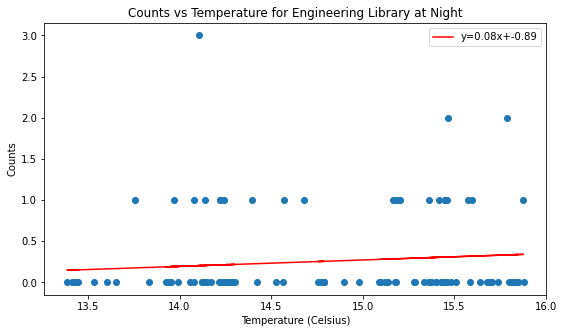

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.003
Method:                     Least Squares   F-statistic:                     1.322
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.253
Time:                            04:51:46   Log-Likelihood:                -90.458
No. Observations:                     118   AIC:                             184.9
Df Residuals:                         116   BIC:                             190.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [361]:
x = EngNightData["Temperature"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')              
plt.title("Counts vs Temperature for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

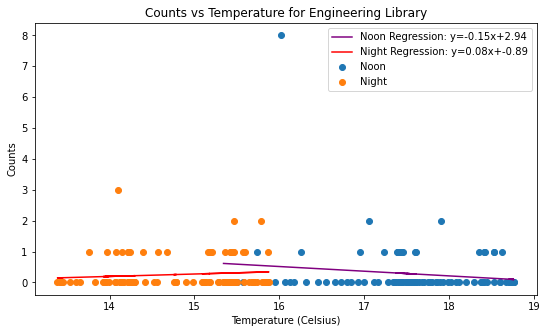

In [362]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Temperature"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#x1 = list(x)
#q1 = list(q)
#x_comb = []
#x_comb.append(x1)
#x_comb.append(q1)

#y1 = list(y)
#r1 = list(r)
#y_comb = []
#y_comb.append(y1)
#y_comb.append(r1)
#X = sm.add_constant(x_comb)
#res = sm.OLS(y_comb, X).fit()
#print(res.summary())
#print(x_comb)
#print(y_comb)

#### Etheverry Hall

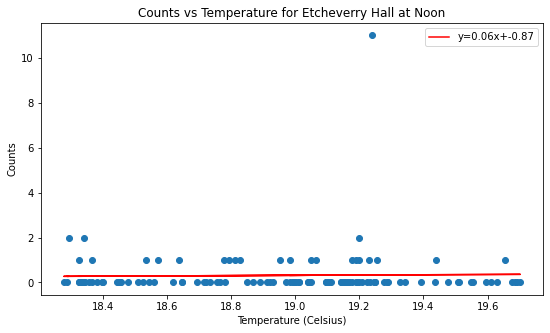

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.06022
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.807
Time:                            04:51:47   Log-Likelihood:                -178.08
No. Observations:                     118   AIC:                             360.2
Df Residuals:                         116   BIC:                             365.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [363]:
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

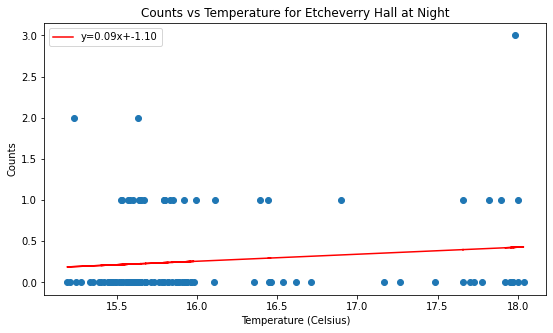

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.017
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     1.947
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.166
Time:                            04:51:47   Log-Likelihood:                -91.018
No. Observations:                     118   AIC:                             186.0
Df Residuals:                         116   BIC:                             191.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [364]:
x = EtchNightData["Temperature"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')              
plt.title("Counts vs Temperature for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

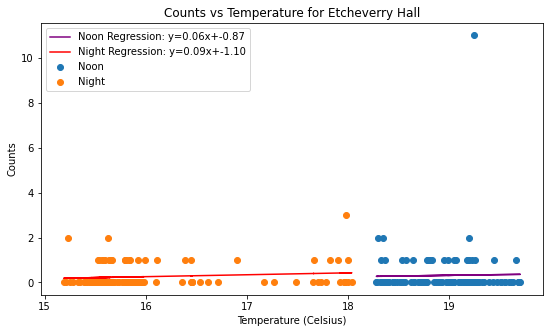

In [365]:
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Temperature"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

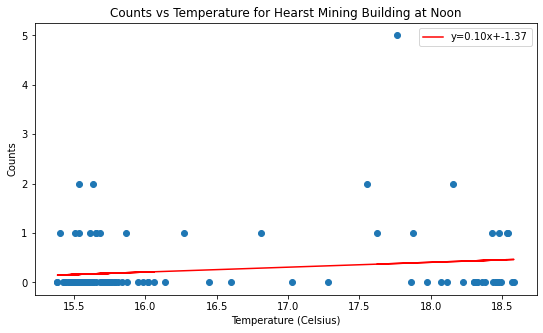

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.031
Model:                                OLS   Adj. R-squared:                  0.022
Method:                     Least Squares   F-statistic:                     3.686
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0573
Time:                            04:51:48   Log-Likelihood:                -114.78
No. Observations:                     118   AIC:                             233.6
Df Residuals:                         116   BIC:                             239.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [366]:
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Temperature"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

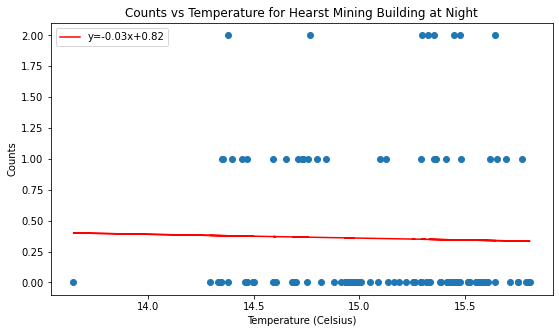

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.05935
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.808
Time:                            04:51:48   Log-Likelihood:                -107.91
No. Observations:                     118   AIC:                             219.8
Df Residuals:                         116   BIC:                             225.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [367]:
x = HearstNightData["Temperature"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Temperature"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

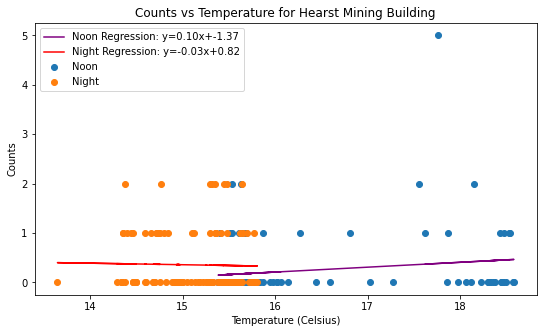

In [368]:
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Temperature"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Temperature"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Temperature"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

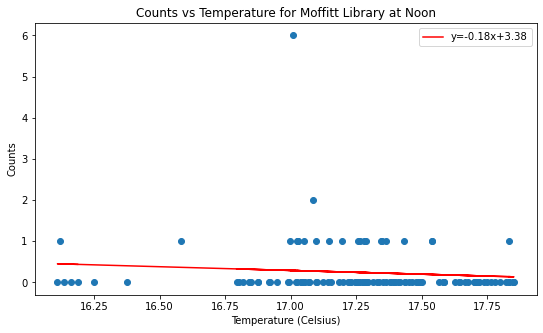

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.003
Method:                     Least Squares   F-statistic:                     1.296
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.257
Time:                            04:51:48   Log-Likelihood:                -120.52
No. Observations:                     118   AIC:                             245.0
Df Residuals:                         116   BIC:                             250.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [369]:
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Temperature"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

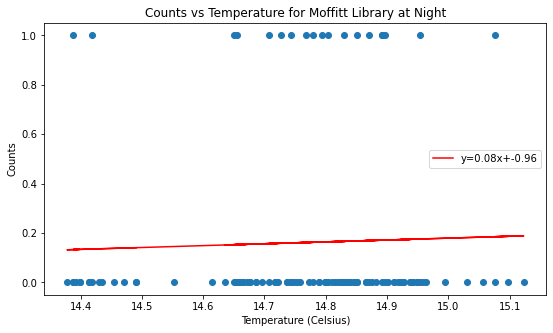

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.1557
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.694
Time:                            04:51:49   Log-Likelihood:                -49.249
No. Observations:                     118   AIC:                             102.5
Df Residuals:                         116   BIC:                             108.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In [370]:
x = MoffittNightData["Temperature"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Temperature"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.title("Counts vs Temperature for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

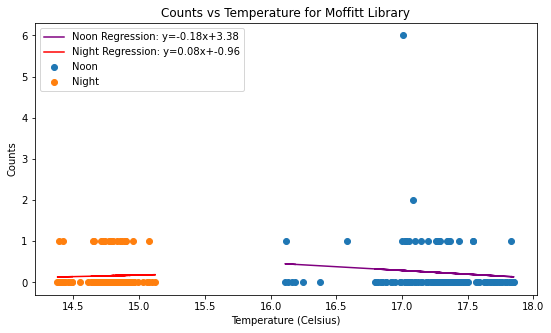

In [371]:
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Temperature"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Temperature"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Temperature"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

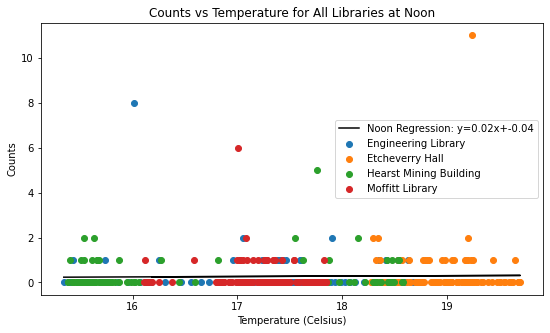

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3139
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.576
Time:                        04:51:49   Log-Likelihood:                -584.94
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0411      0.563     -0.073      0.9

In [372]:
x = []
x.extend(EngNoonData["Temperature"])
x.extend(EtchNoonData["Temperature"])
x.extend(HearstNoonData["Temperature"])
x.extend(MoffittNoonData["Temperature"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Temperature"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Temperature"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Temperature"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Temperature"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

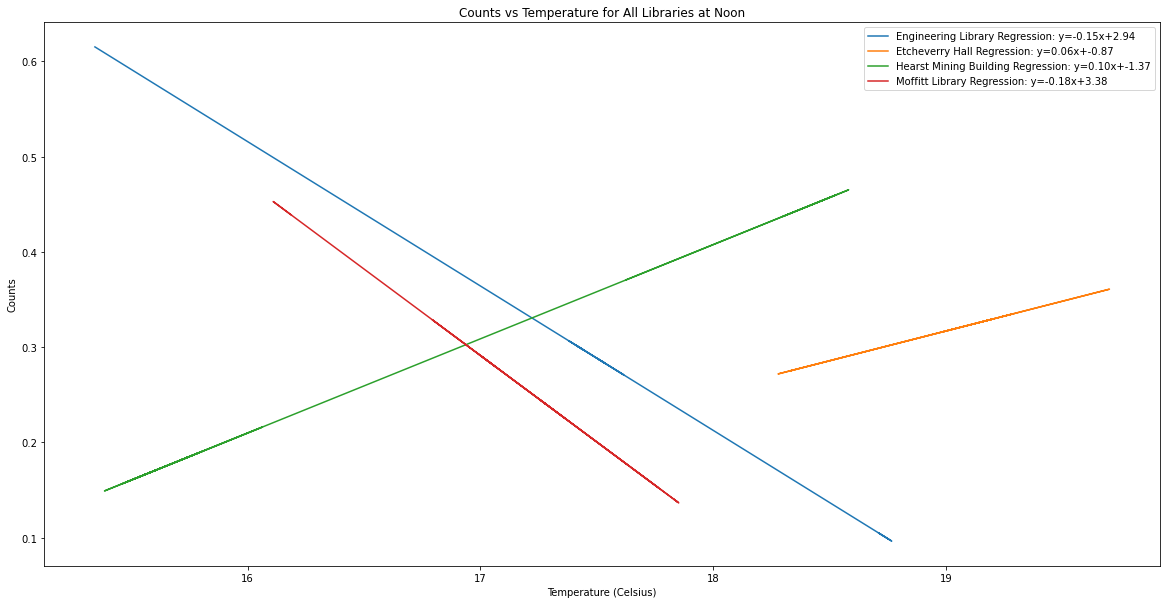

In [373]:
x = EngNoonData["Temperature"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Temperature"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Temperature"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Temperature"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

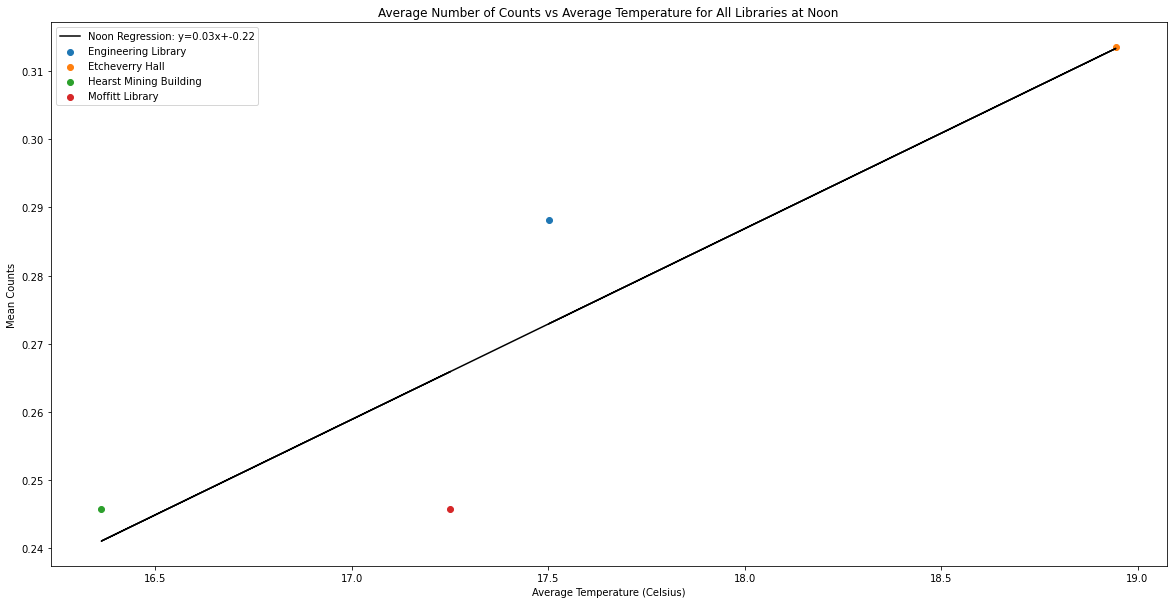

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     8.194
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.103
Time:                        04:51:50   Log-Likelihood:                 11.747
No. Observations:                   4   AIC:                            -19.49
Df Residuals:                       2   BIC:                            -20.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2171      0.172     -1.265      0.3

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [374]:
x = [np.mean(EngNoonData["Temperature"]), np.mean(EtchNoonData["Temperature"]), np.mean(HearstNoonData["Temperature"]), np.mean(MoffittNoonData["Temperature"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Temperature"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Temperature"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Temperature"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Temperature"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Temperature (Celsius)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Temperature for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

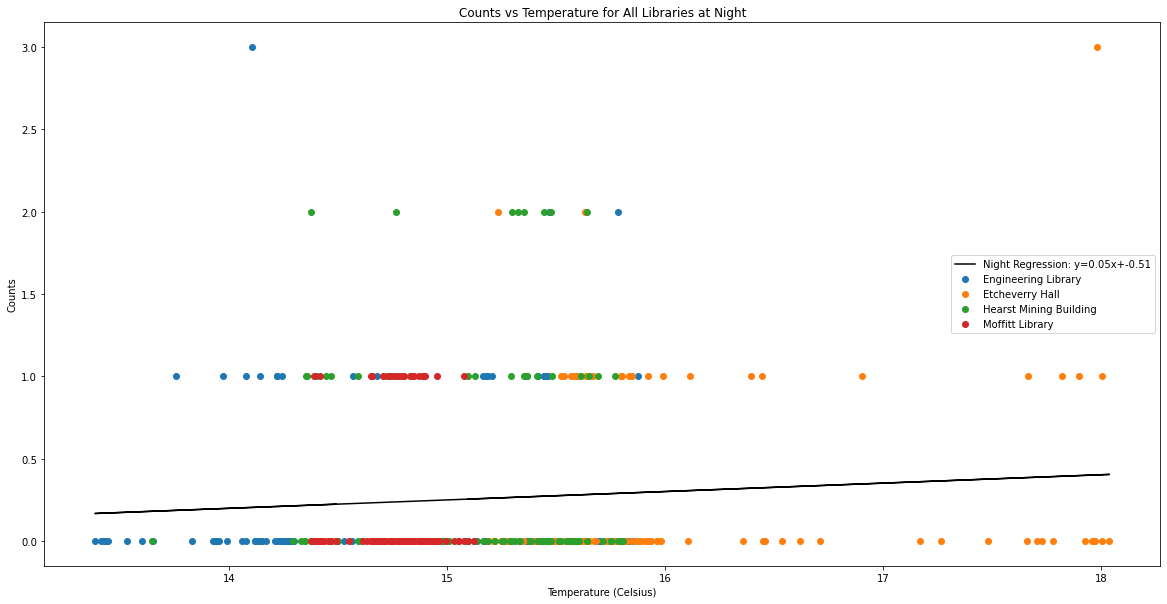

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.886
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0900
Time:                        04:51:50   Log-Likelihood:                -357.48
No. Observations:                 472   AIC:                             719.0
Df Residuals:                     470   BIC:                             727.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5150      0.456     -1.130      0.2

In [375]:
x = []
x.extend(EngNightData["Temperature"])
x.extend(EtchNightData["Temperature"])
x.extend(HearstNightData["Temperature"])
x.extend(MoffittNightData["Temperature"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Temperature"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Temperature"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Temperature"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Temperature"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

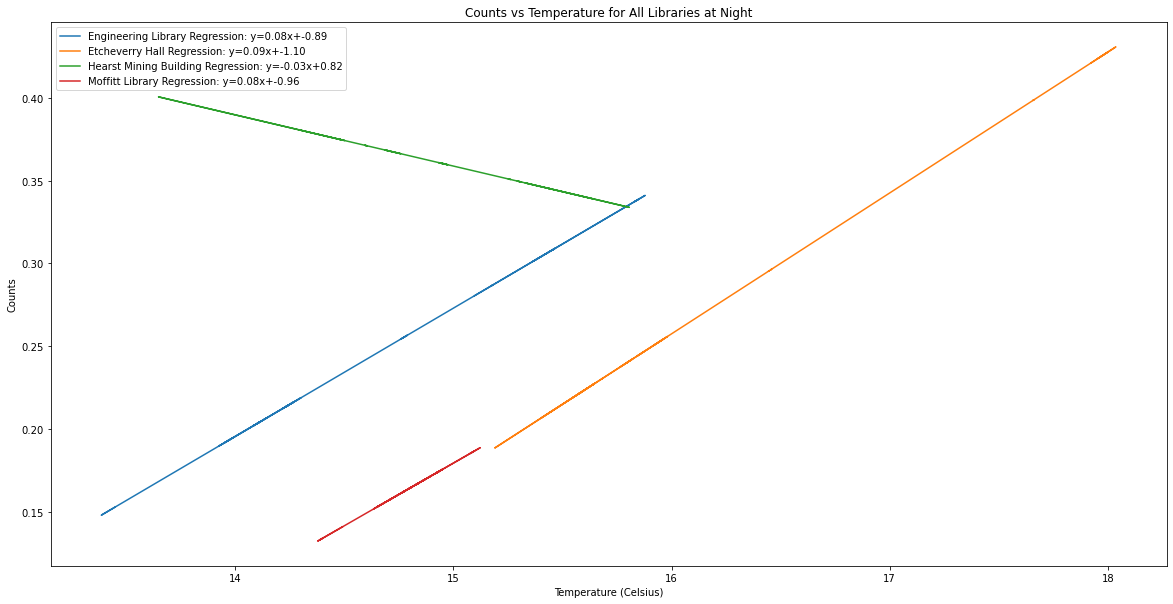

In [376]:
x = EngNightData["Temperature"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Temperature"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Temperature"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Temperature"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Temperature (Celsius)')
plt.legend()                  
plt.title("Counts vs Temperature for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

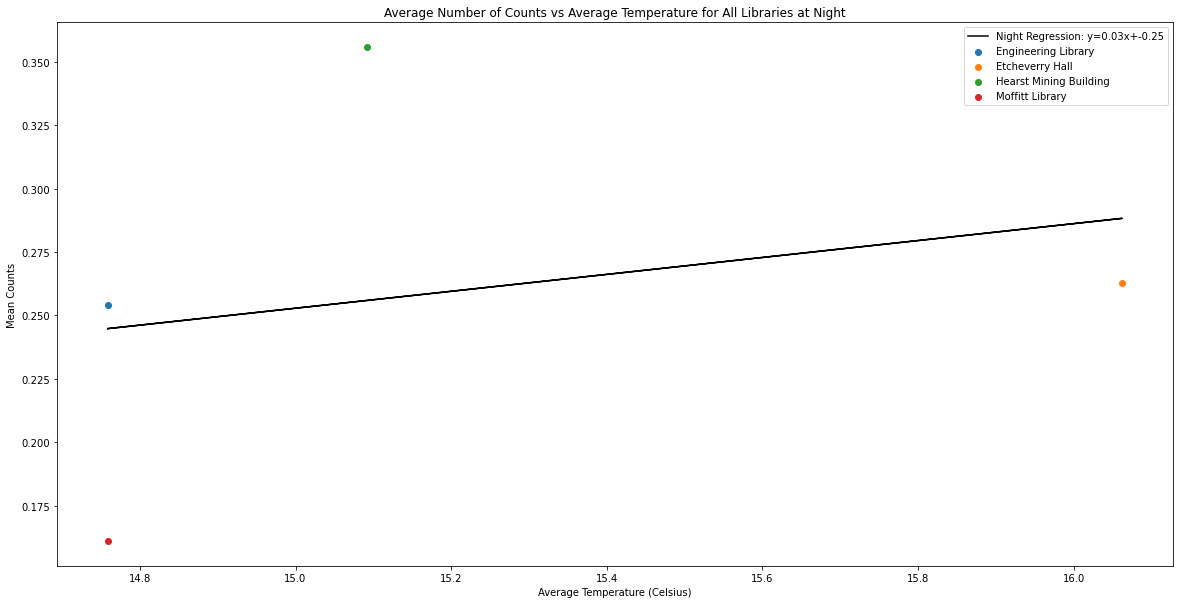

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.400
Method:                 Least Squares   F-statistic:                    0.1430
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.742
Time:                        04:51:51   Log-Likelihood:                 5.1582
No. Observations:                   4   AIC:                            -6.316
Df Residuals:                       2   BIC:                            -7.544
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2476      1.339     -0.185      0.8

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [377]:
x = [np.mean(EngNightData["Temperature"]), np.mean(EtchNightData["Temperature"]), np.mean(HearstNightData["Temperature"]), np.mean(MoffittNightData["Temperature"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Temperature"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Temperature"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Temperature"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Temperature"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Temperature (Celsius)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Temperature for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Humidity Data for Both Noon and Night Times at Each Location

#### Engineering Library

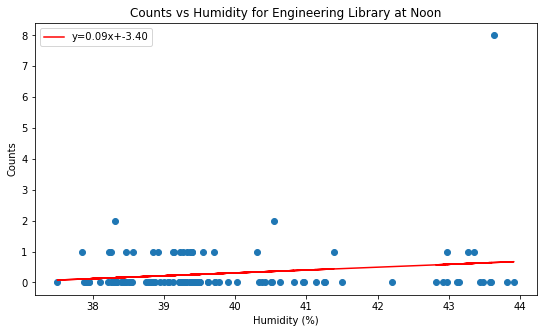

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.031
Model:                                OLS   Adj. R-squared:                  0.023
Method:                     Least Squares   F-statistic:                     3.724
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0561
Time:                            04:52:17   Log-Likelihood:                -145.66
No. Observations:                     118   AIC:                             295.3
Df Residuals:                         116   BIC:                             300.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [398]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

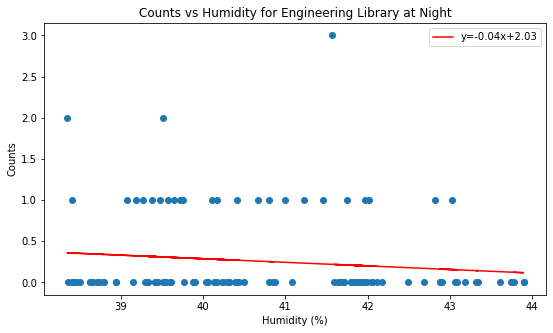

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.016
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     1.888
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.172
Time:                            04:51:52   Log-Likelihood:                -90.174
No. Observations:                     118   AIC:                             184.3
Df Residuals:                         116   BIC:                             189.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [379]:
x = EngNightData["Humidity"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')              
plt.title("Counts vs Humidity for Engineering Library at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

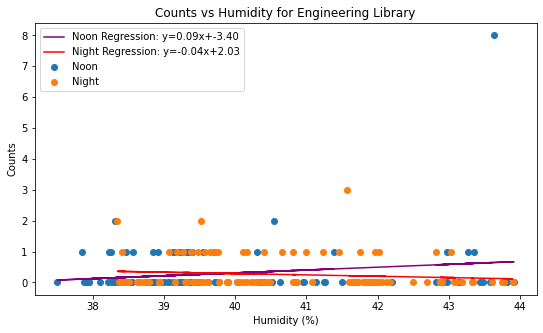

In [380]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Humidity"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Engineering Library")   
plt.rcParams['figure.figsize'] = [9, 6]
plt.legend()
plt.show()

#### Etcheverry Hall

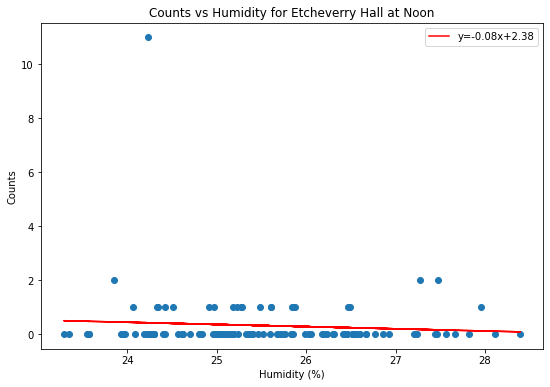

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.8029
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.372
Time:                            04:51:52   Log-Likelihood:                -177.70
No. Observations:                     118   AIC:                             359.4
Df Residuals:                         116   BIC:                             364.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [381]:
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Etcheverry Hall at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

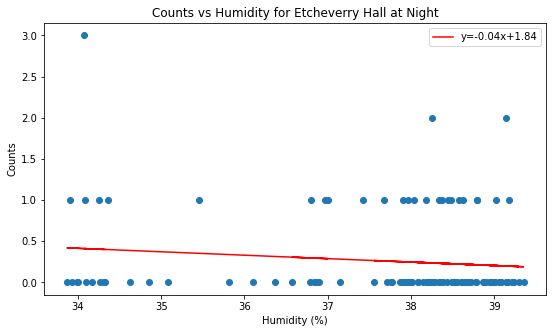

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.016
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     1.921
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.168
Time:                            04:51:52   Log-Likelihood:                -91.031
No. Observations:                     118   AIC:                             186.1
Df Residuals:                         116   BIC:                             191.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [382]:
x = EtchNightData["Humidity"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Etcheverry Hall at Night") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

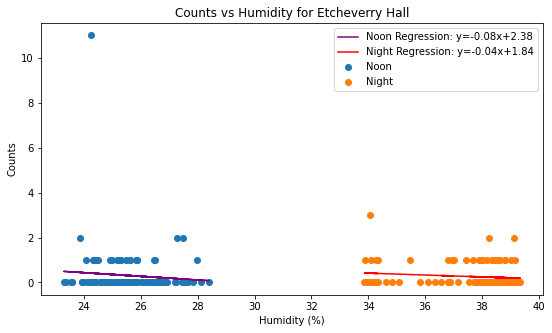

In [383]:
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Humidity"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

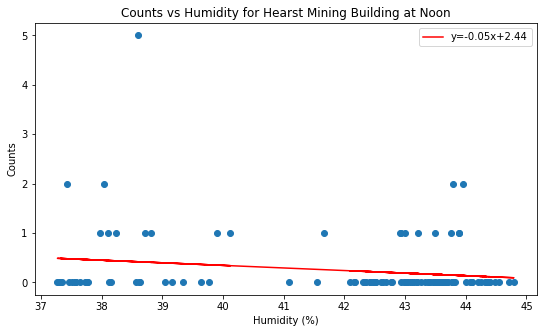

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.037
Model:                                OLS   Adj. R-squared:                  0.029
Method:                     Least Squares   F-statistic:                     4.457
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):             0.0369
Time:                            04:51:53   Log-Likelihood:                -114.40
No. Observations:                     118   AIC:                             232.8
Df Residuals:                         116   BIC:                             238.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [384]:
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Humidity"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

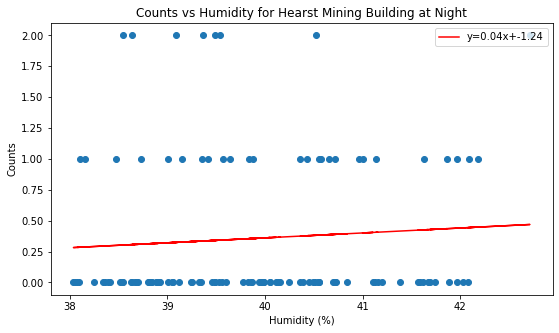

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.6808
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.411
Time:                            04:51:53   Log-Likelihood:                -107.60
No. Observations:                     118   AIC:                             219.2
Df Residuals:                         116   BIC:                             224.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [385]:
x = HearstNightData["Humidity"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Humidity"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

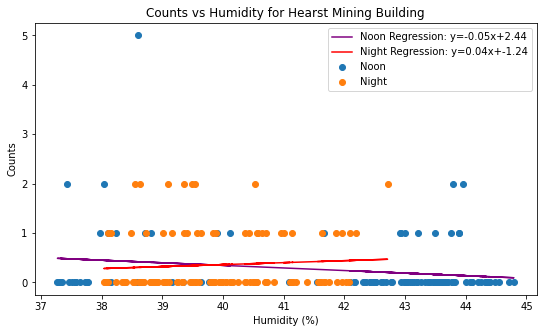

In [386]:
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Humidity"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Humidity"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Humidity"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

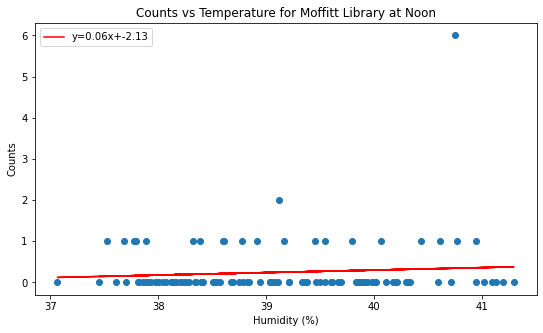

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.9741
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.326
Time:                            04:51:54   Log-Likelihood:                -120.68
No. Observations:                     118   AIC:                             245.4
Df Residuals:                         116   BIC:                             250.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [387]:
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Humidity"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Temperature for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

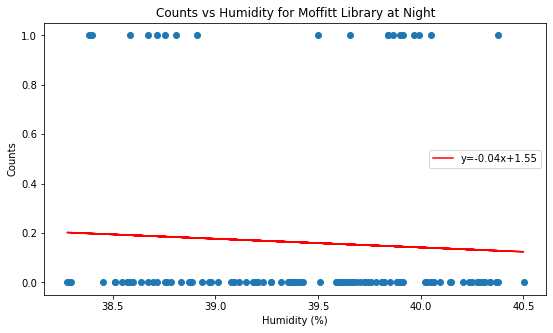

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                 -0.005
Method:                     Least Squares   F-statistic:                    0.3661
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.546
Time:                            04:51:54   Log-Likelihood:                -49.142
No. Observations:                     118   AIC:                             102.3
Df Residuals:                         116   BIC:                             107.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [388]:
x = MoffittNightData["Humidity"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Humidity"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.title("Counts vs Humidity for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

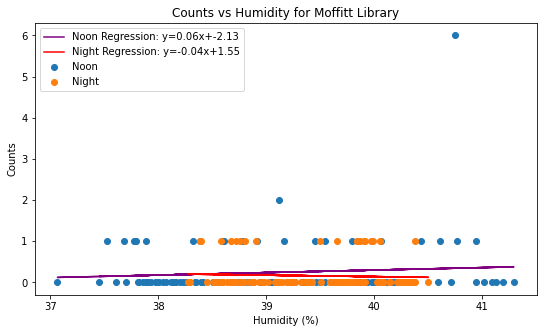

In [389]:
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Humidity"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Humidity"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Humidity"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 8]
plt.legend()
plt.show()

#### All Buildings at Noon

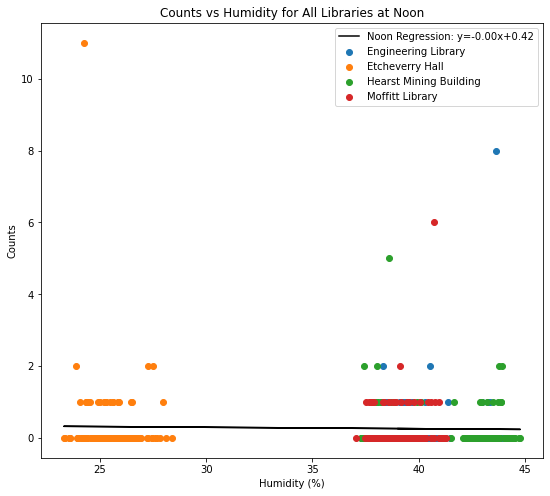

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4805
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.489
Time:                        04:51:55   Log-Likelihood:                -584.85
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4196      0.215      1.956      0.0

In [390]:
x = []
x.extend(EngNoonData["Humidity"])
x.extend(EtchNoonData["Humidity"])
x.extend(HearstNoonData["Humidity"])
x.extend(MoffittNoonData["Humidity"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Humidity"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Humidity"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Humidity"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Humidity"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

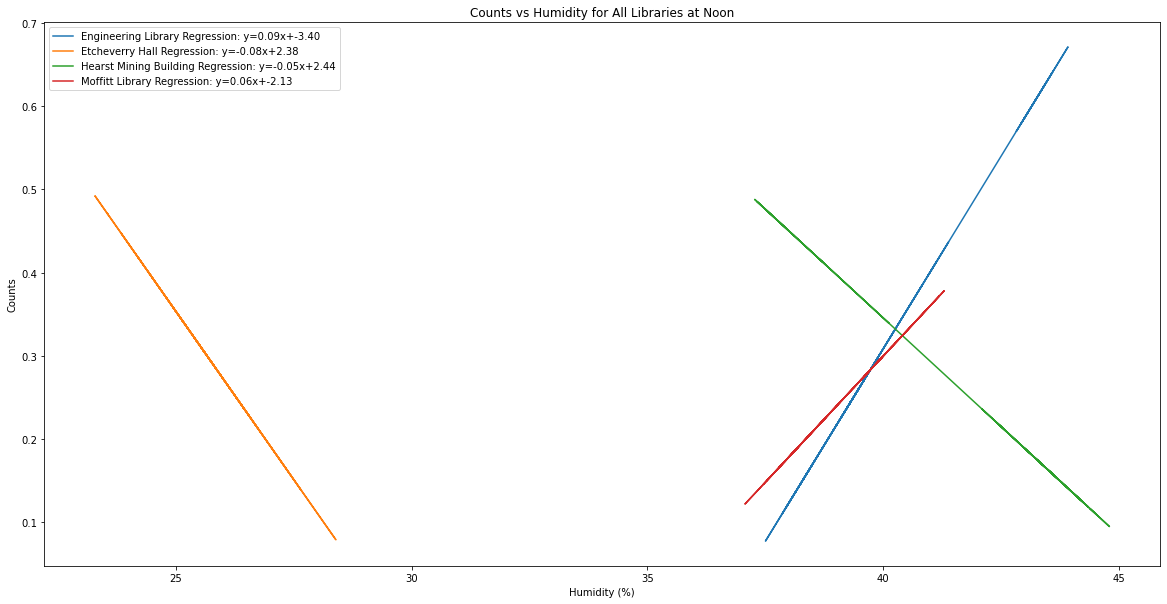

In [391]:
x = EngNoonData["Humidity"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Humidity"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Humidity"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Humidity"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

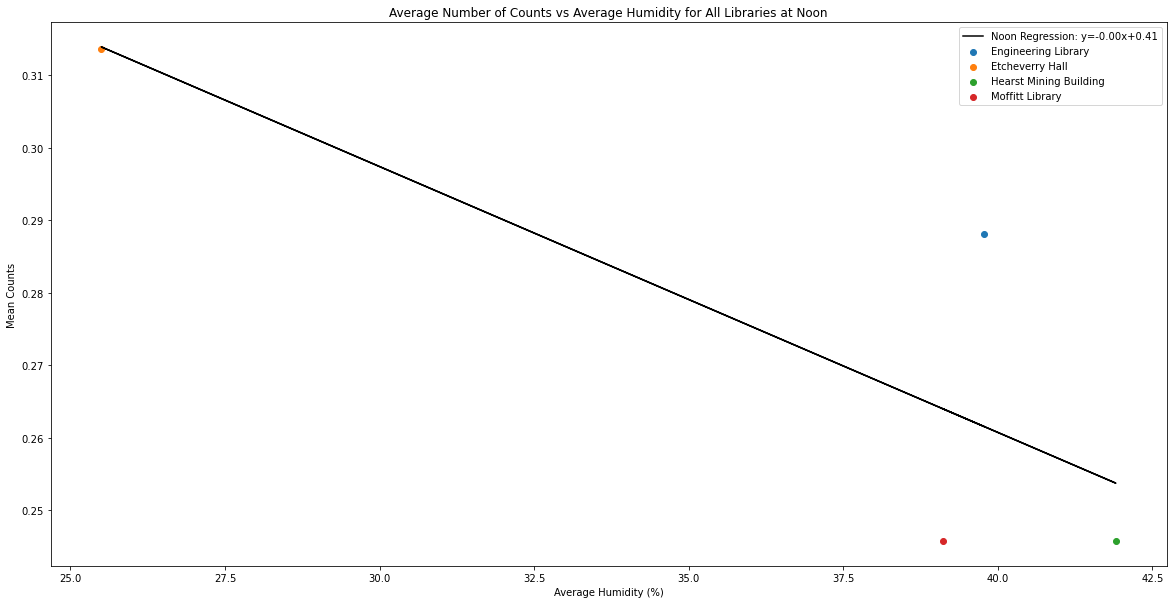

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4.087
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.181
Time:                        04:51:55   Log-Likelihood:                 10.716
No. Observations:                   4   AIC:                            -17.43
Df Residuals:                       2   BIC:                            -18.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4074      0.067      6.049      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [392]:
x = [np.mean(EngNoonData["Humidity"]), np.mean(EtchNoonData["Humidity"]), np.mean(HearstNoonData["Humidity"]), np.mean(MoffittNoonData["Humidity"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Humidity"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Humidity"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Humidity"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Humidity"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Humidity (%)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Humidity for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

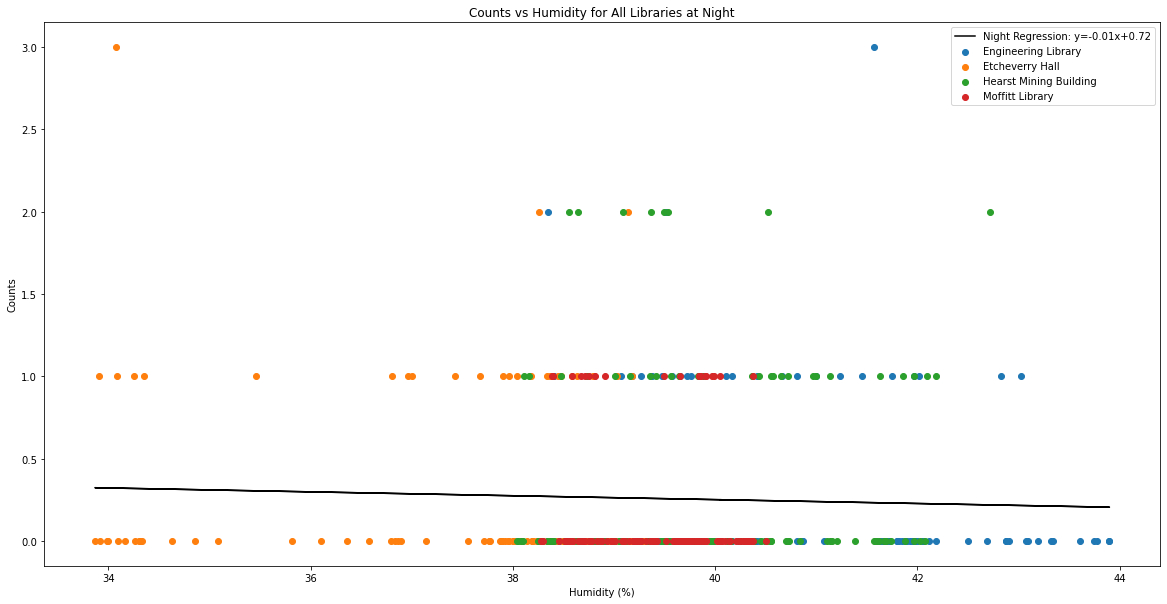

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7231
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.396
Time:                        04:51:56   Log-Likelihood:                -358.56
No. Observations:                 472   AIC:                             721.1
Df Residuals:                     470   BIC:                             729.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7232      0.547      1.322      0.1

In [393]:
x = []
x.extend(EngNightData["Humidity"])
x.extend(EtchNightData["Humidity"])
x.extend(HearstNightData["Humidity"])
x.extend(MoffittNightData["Humidity"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Humidity"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Humidity"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Humidity"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Humidity"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

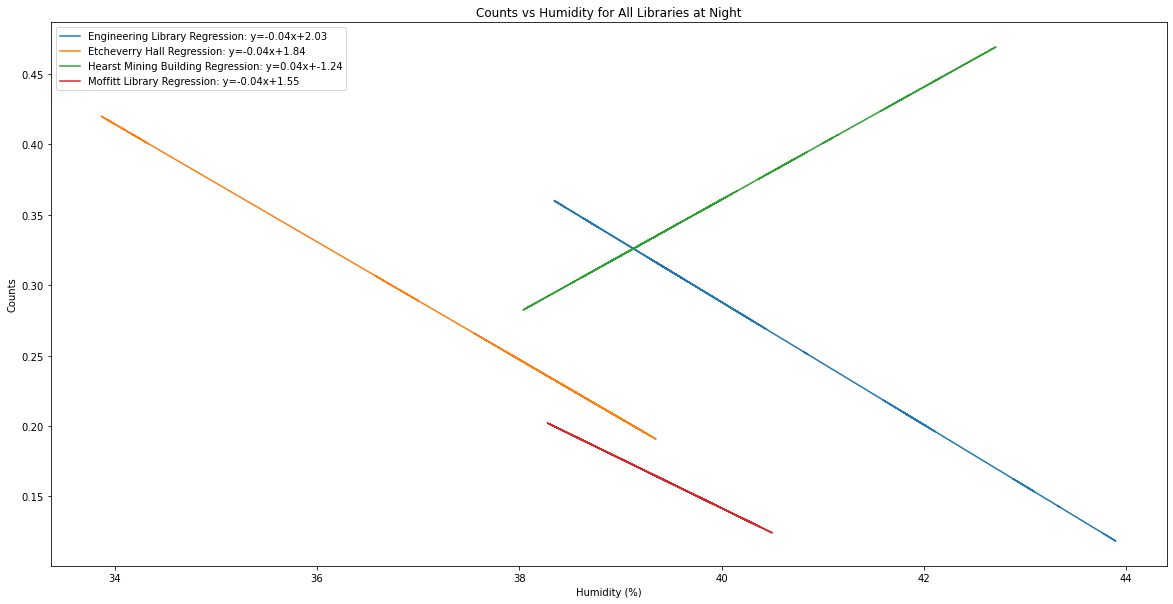

In [394]:
x = EngNightData["Humidity"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Humidity"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Humidity"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Humidity"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Humidity (%)')
plt.legend()                  
plt.title("Counts vs Humidity for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

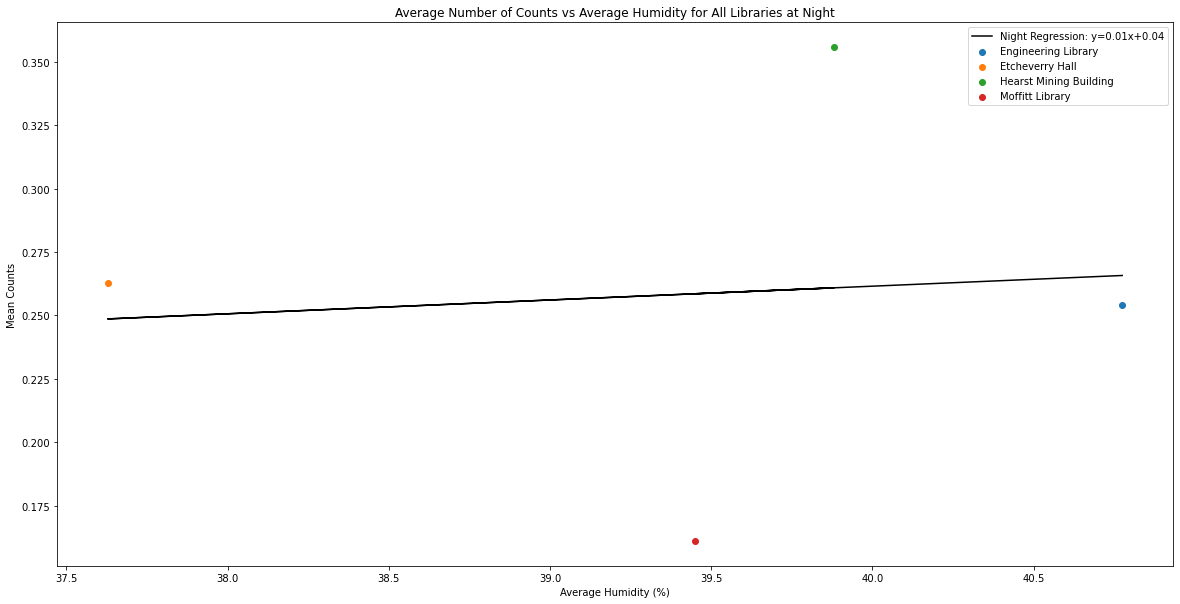

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.488
Method:                 Least Squares   F-statistic:                   0.01651
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.910
Time:                        04:51:56   Log-Likelihood:                 5.0366
No. Observations:                   4   AIC:                            -6.073
Df Residuals:                       2   BIC:                            -7.301
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      1.671      0.026      0.9

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [395]:
x = [np.mean(EngNightData["Humidity"]), np.mean(EtchNightData["Humidity"]), np.mean(HearstNightData["Humidity"]), np.mean(MoffittNightData["Humidity"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Humidity"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Humidity"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Humidity"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Humidity"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Humidity (%)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Humidity for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Pressure Data for Both Noon and Night Times at Each Location

#### Engineering Library

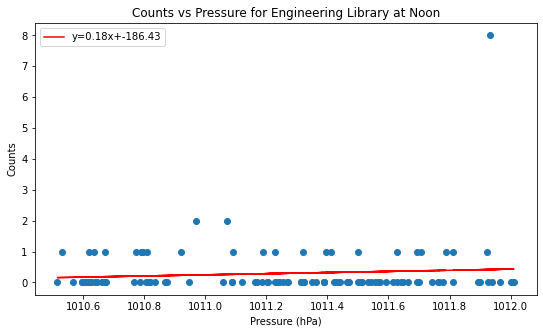

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.056
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.306
Time:                            04:56:30   Log-Likelihood:                -146.99
No. Observations:                     118   AIC:                             298.0
Df Residuals:                         116   BIC:                             303.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [401]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

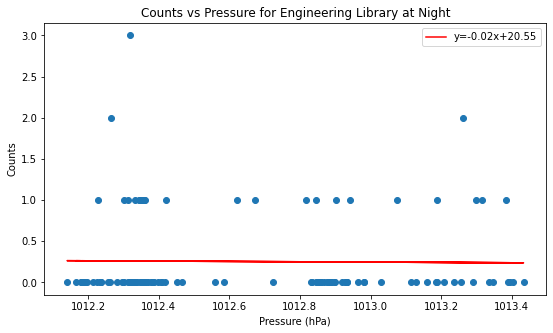

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.008
Method:                     Least Squares   F-statistic:                   0.02505
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.875
Time:                            04:57:05   Log-Likelihood:                -91.114
No. Observations:                     118   AIC:                             186.2
Df Residuals:                         116   BIC:                             191.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [402]:
x = EngNightData["Pressure"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')              
plt.title("Counts vs Pressure for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

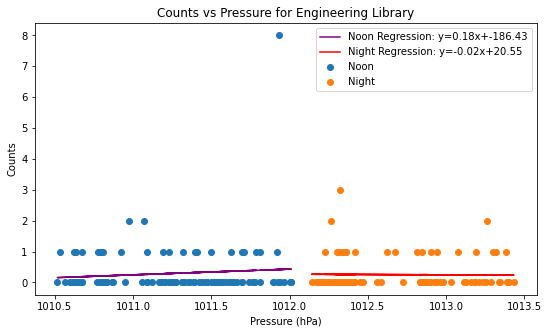

In [403]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EngNightData["Pressure"]
r = EngNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

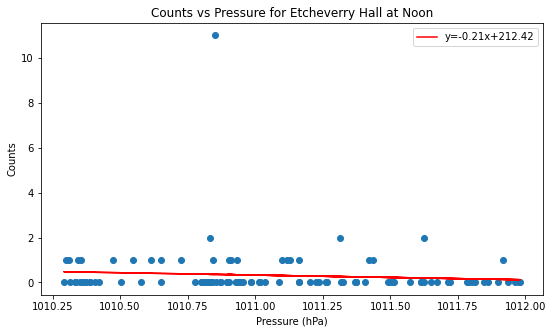

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.9413
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.334
Time:                            04:58:51   Log-Likelihood:                -177.63
No. Observations:                     118   AIC:                             359.3
Df Residuals:                         116   BIC:                             364.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [404]:
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

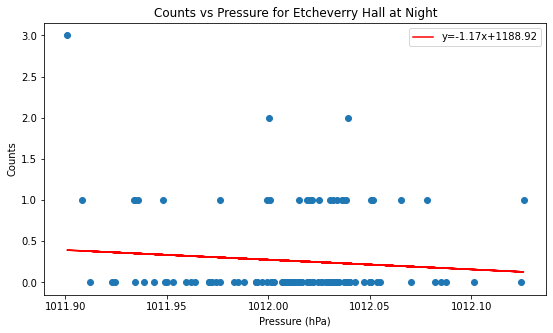

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.031
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.312
Time:                            04:59:59   Log-Likelihood:                -91.478
No. Observations:                     118   AIC:                             187.0
Df Residuals:                         116   BIC:                             192.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [405]:
x = EtchNightData["Pressure"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')              
plt.title("Counts vs Pressure for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

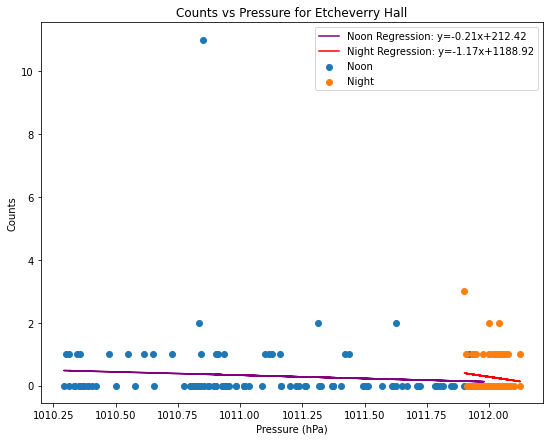

In [408]:
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = EtchNightData["Pressure"]
r = EtchNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 7]
plt.legend()
plt.show()

#### Hearst Mining Building

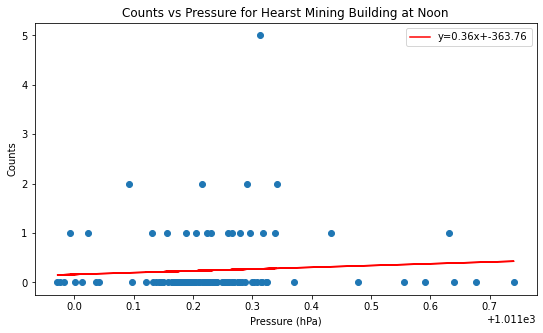

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                 -0.004
Method:                     Least Squares   F-statistic:                    0.5833
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.447
Time:                            05:01:55   Log-Likelihood:                -116.33
No. Observations:                     118   AIC:                             236.7
Df Residuals:                         116   BIC:                             242.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [410]:
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNoonData["Pressure"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

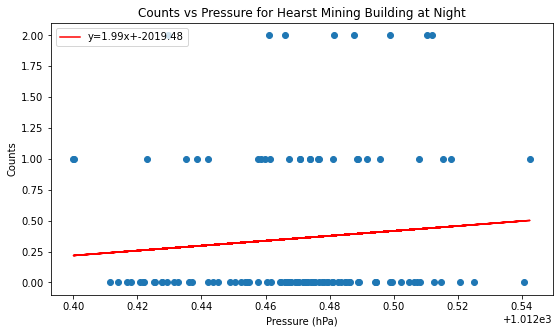

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.080
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.301
Time:                            05:02:32   Log-Likelihood:                -107.40
No. Observations:                     118   AIC:                             218.8
Df Residuals:                         116   BIC:                             224.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

In [411]:
x = HearstNightData["Pressure"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(HearstNightData["Pressure"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

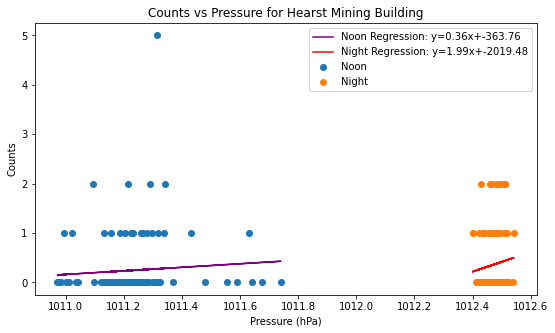

In [412]:
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = HearstNightData["Pressure"]
r = HearstNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(HearstNoonData["Pressure"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["Pressure"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

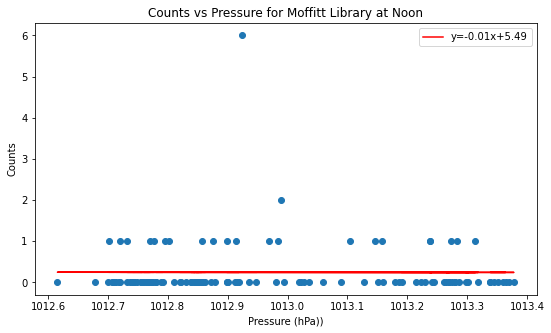

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.009
Method:                     Least Squares   F-statistic:                 0.0003306
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.986
Time:                            05:04:12   Log-Likelihood:                -121.18
No. Observations:                     118   AIC:                             246.4
Df Residuals:                         116   BIC:                             251.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [413]:
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNoonData["Pressure"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa))')
plt.title("Counts vs Pressure for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

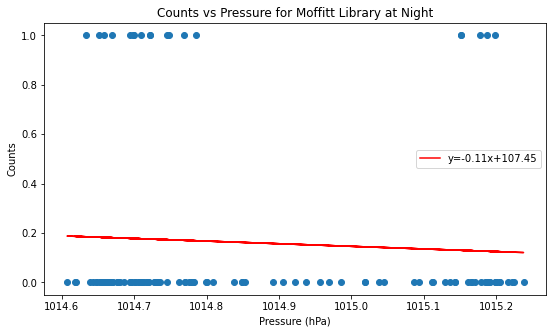

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.005
Method:                     Least Squares   F-statistic:                    0.4305
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):              0.513
Time:                            05:04:50   Log-Likelihood:                -49.109
No. Observations:                     118   AIC:                             102.2
Df Residuals:                         116   BIC:                             107.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [414]:
x = MoffittNightData["Pressure"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.scatter(MoffittNightData["Pressure"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.title("Counts vs Pressure for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

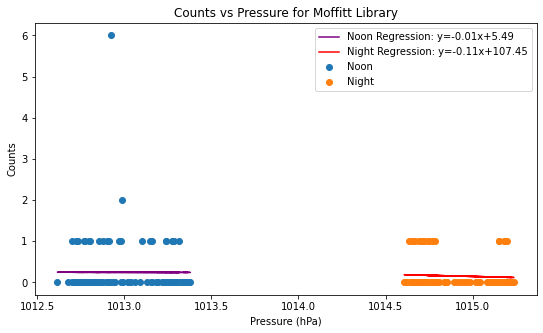

In [415]:
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
q = MoffittNightData["Pressure"]
r = MoffittNightData["Counts within Interval"]
s, i = np.polyfit(q, r, 1)
plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.scatter(MoffittNoonData["Pressure"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["Pressure"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

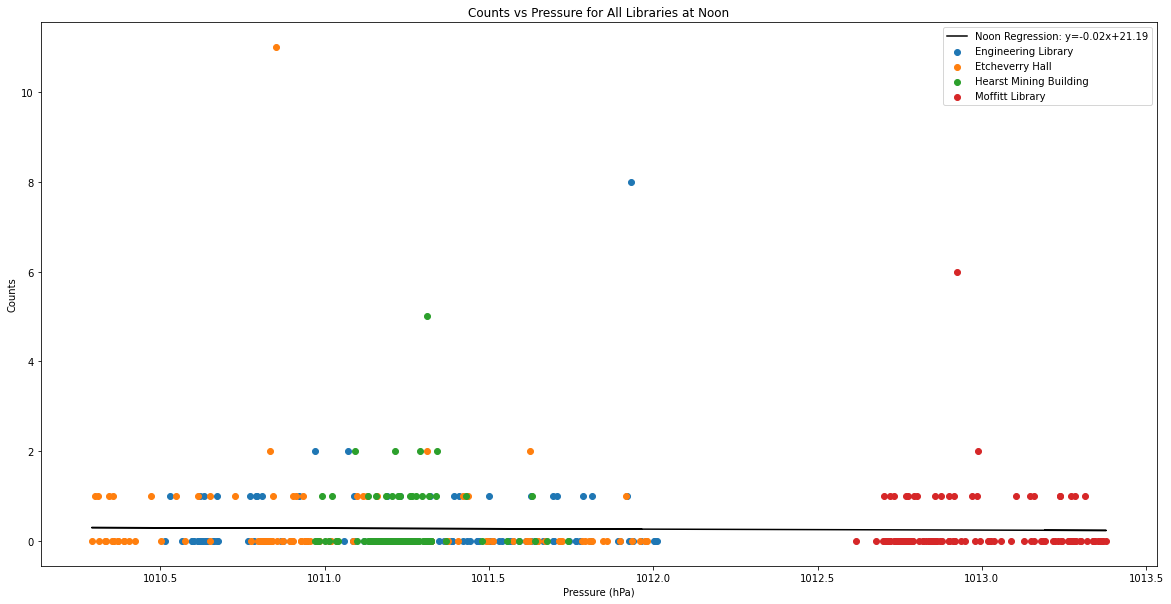

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2087
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.648
Time:                        05:07:20   Log-Likelihood:                -584.99
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1868     45.775      0.463      0.6

In [417]:
x = []
x.extend(EngNoonData["Pressure"])
x.extend(EtchNoonData["Pressure"])
x.extend(HearstNoonData["Pressure"])
x.extend(MoffittNoonData["Pressure"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["Pressure"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["Pressure"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["Pressure"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["Pressure"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

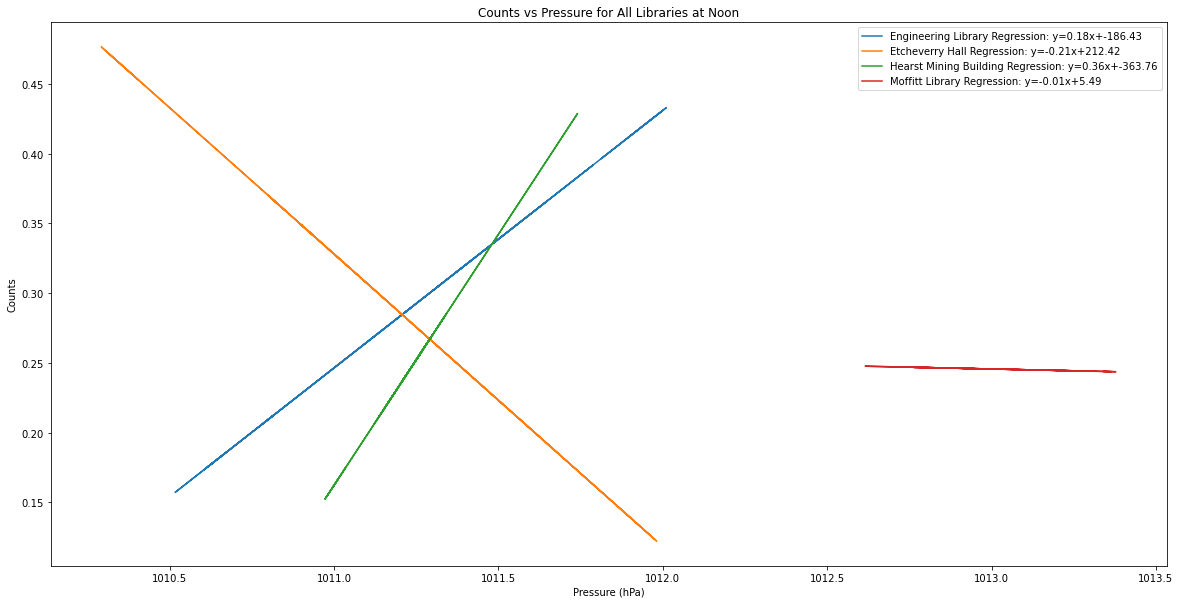

In [418]:
x = EngNoonData["Pressure"]
y = EngNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNoonData["Pressure"]
y = EtchNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNoonData["Pressure"]
y = HearstNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNoonData["Pressure"]
y = MoffittNoonData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

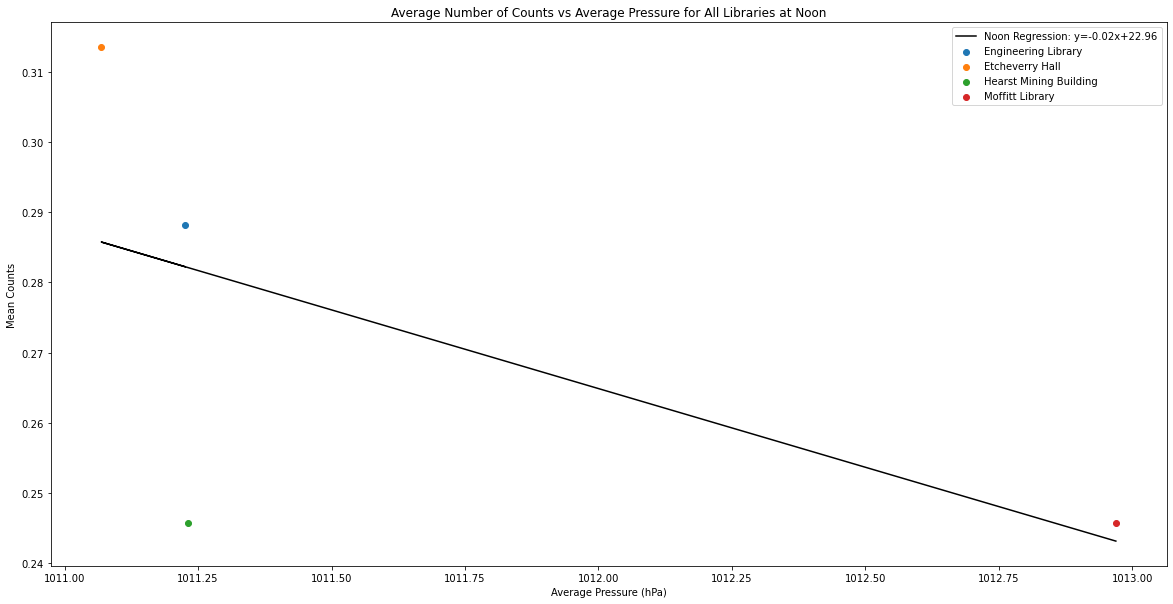

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.145
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.397
Time:                        05:10:22   Log-Likelihood:                 9.3953
No. Observations:                   4   AIC:                            -14.79
Df Residuals:                       2   BIC:                            -16.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9633     21.205      1.083      0.3

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [419]:
x = [np.mean(EngNoonData["Pressure"]), np.mean(EtchNoonData["Pressure"]), np.mean(HearstNoonData["Pressure"]), np.mean(MoffittNoonData["Pressure"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["Pressure"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["Pressure"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["Pressure"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["Pressure"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Pressure (hPa)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Pressure for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

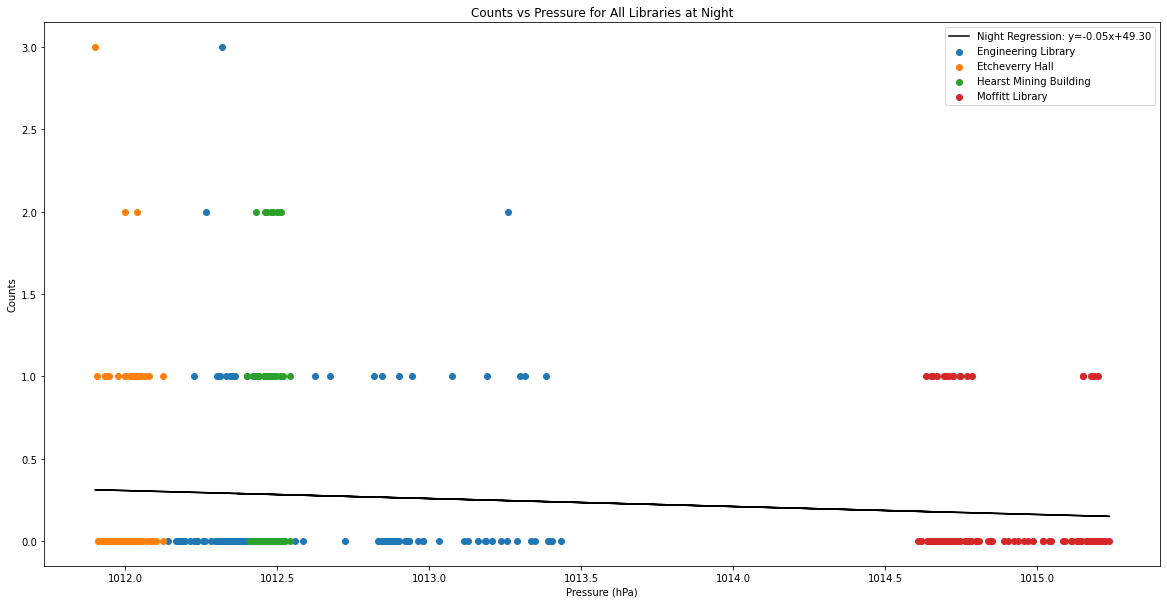

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.231
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0226
Time:                        05:12:01   Log-Likelihood:                -356.31
No. Observations:                 472   AIC:                             716.6
Df Residuals:                     470   BIC:                             724.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2972     21.440      2.299      0.0

In [420]:
x = []
x.extend(EngNightData["Pressure"])
x.extend(EtchNightData["Pressure"])
x.extend(HearstNightData["Pressure"])
x.extend(MoffittNightData["Pressure"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["Pressure"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["Pressure"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["Pressure"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["Pressure"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

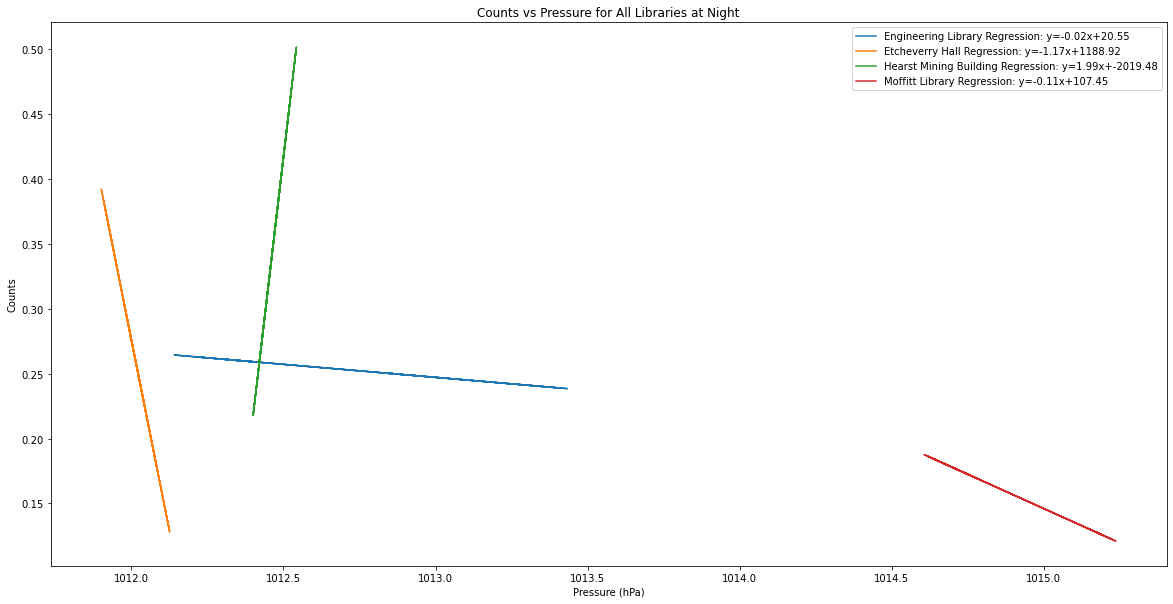

In [421]:
x = EngNightData["Pressure"]
y = EngNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Engineering Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = EtchNightData["Pressure"]
y = EtchNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Etcheverry Hall Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = HearstNightData["Pressure"]
y = HearstNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Hearst Mining Building Regression: y={:.2f}x+{:.2f}'.format(m,b))
x = MoffittNightData["Pressure"]
y = MoffittNightData["Counts within Interval"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, label = 'Moffitt Library Regression: y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Counts') 
plt.xlabel('Pressure (hPa)')
plt.legend()                  
plt.title("Counts vs Pressure for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

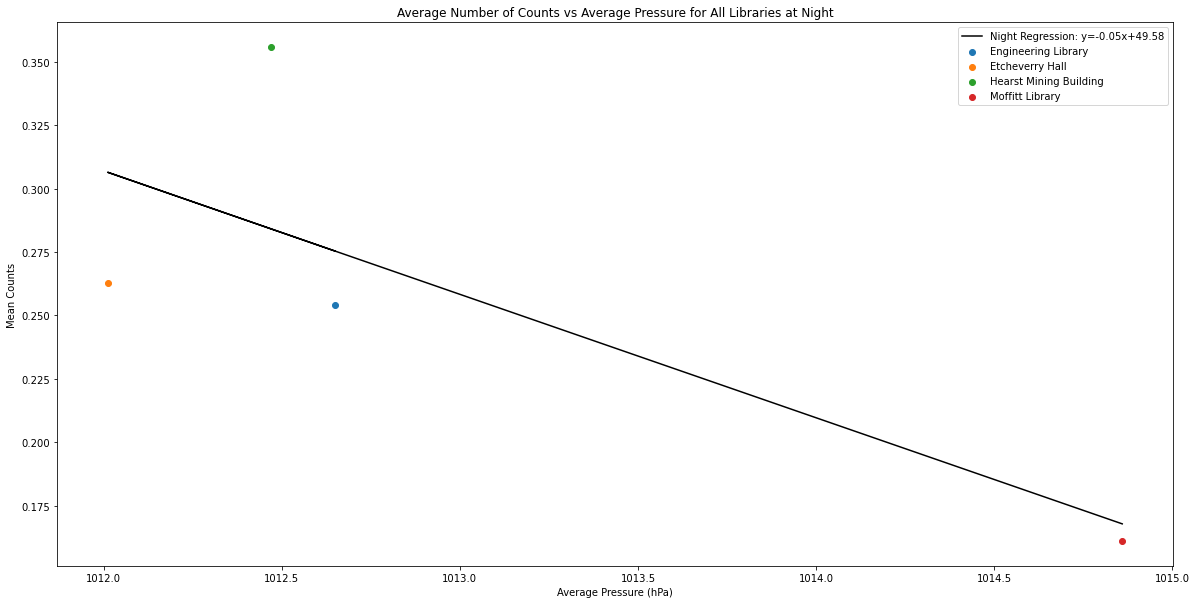

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3.035
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.224
Time:                        05:13:57   Log-Likelihood:                 6.8668
No. Observations:                   4   AIC:                            -9.734
Df Residuals:                       2   BIC:                            -10.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5792     28.309      1.751      0.2

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [422]:
x = [np.mean(EngNightData["Pressure"]), np.mean(EtchNightData["Pressure"]), np.mean(HearstNightData["Pressure"]), np.mean(MoffittNightData["Pressure"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["Pressure"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["Pressure"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["Pressure"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["Pressure"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average Pressure (hPa)')
plt.legend()                  
plt.title("Average Number of Counts vs Average Pressure for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 1) Data for Both Noon and Night Times at Each Location

#### Engineering Library

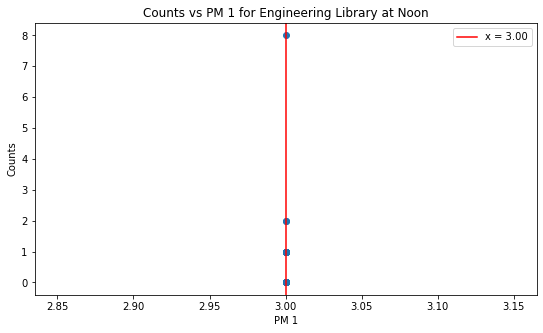

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            05:55:46   Log-Likelihood:                -147.53
No. Observations:                     118   AIC:                             297.1
Df Residuals:                         117   BIC:                             299.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [464]:
x = EngNoonData["PM 1"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, 0.096*x, label = 'y=0.096x+0.000'.format(m,b), color = 'red')
plt.axvline(x = 3.0, label = 'x = 3.00', color = 'red')
plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

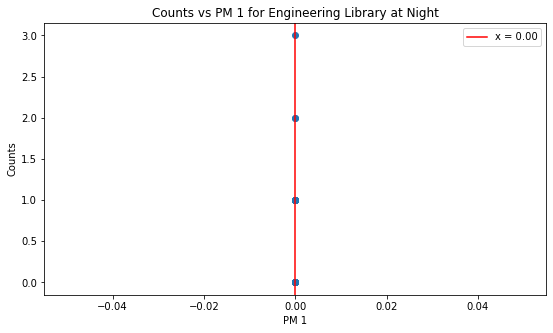

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            05:57:08   Log-Likelihood:                -91.126
No. Observations:                     118   AIC:                             184.3
Df Residuals:                         117   BIC:                             187.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [467]:
x = EngNightData["PM 1"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')              
plt.title("Counts vs PM 1 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

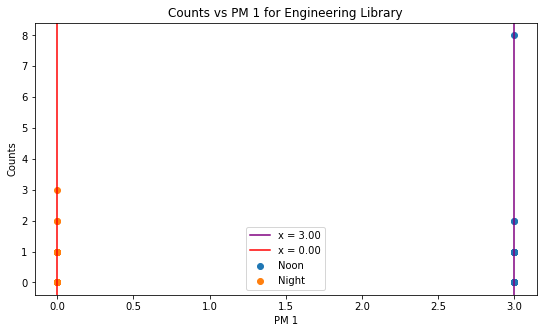

In [469]:
x = EngNoonData["PM 1"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 3.0, label = 'x = 3.00', color = 'purple')
q = EngNightData["PM 1"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

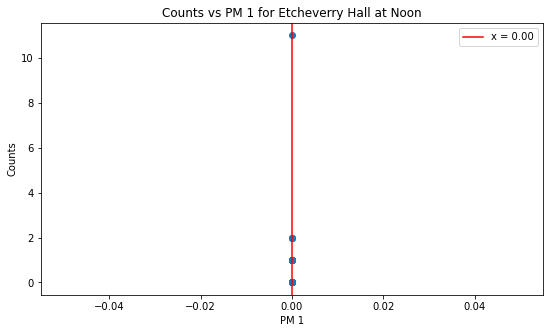

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:00:33   Log-Likelihood:                -178.11
No. Observations:                     118   AIC:                             358.2
Df Residuals:                         117   BIC:                             361.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [473]:
x = EtchNoonData["PM 1"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

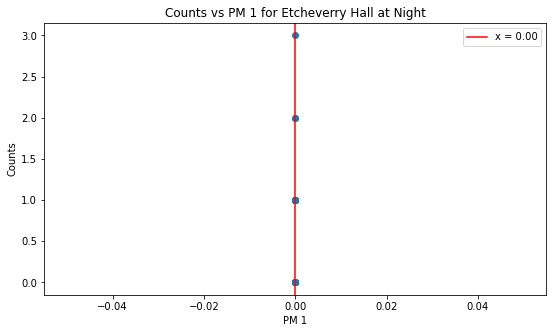

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:02:21   Log-Likelihood:                -92.000
No. Observations:                     118   AIC:                             186.0
Df Residuals:                         117   BIC:                             188.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [474]:
x = EtchNightData["PM 1"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')              
plt.title("Counts vs PM 1 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

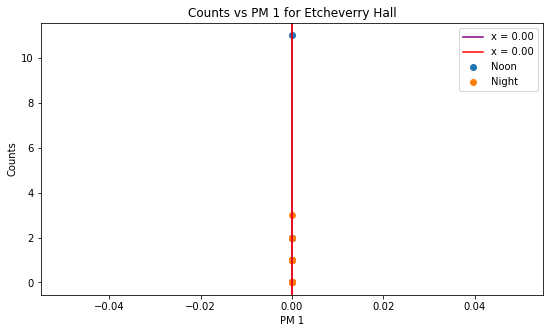

In [475]:
x = EtchNoonData["PM 1"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'purple')
q = EtchNightData["PM 1"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

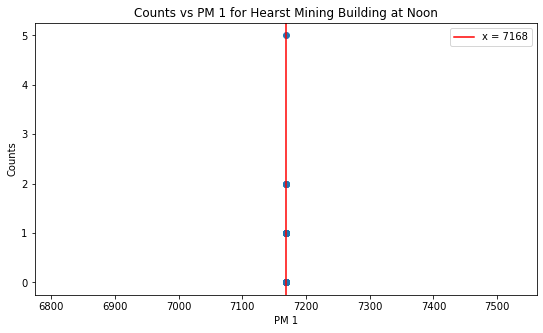

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:05:26   Log-Likelihood:                -116.62
No. Observations:                     118   AIC:                             235.2
Df Residuals:                         117   BIC:                             238.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [476]:
x = HearstNoonData["PM 1"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 7168, label = 'x = 7168', color = 'red')
plt.scatter(HearstNoonData["PM 1"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

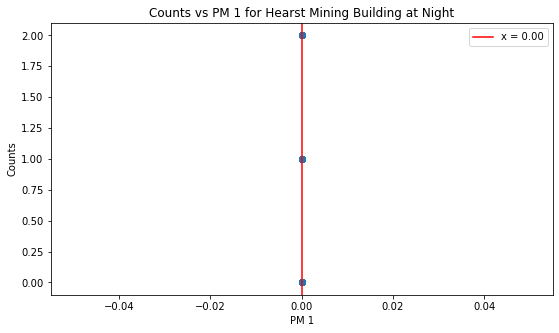

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:06:28   Log-Likelihood:                -107.94
No. Observations:                     118   AIC:                             217.9
Df Residuals:                         117   BIC:                             220.7
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [477]:
x = HearstNightData["PM 1"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 1"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

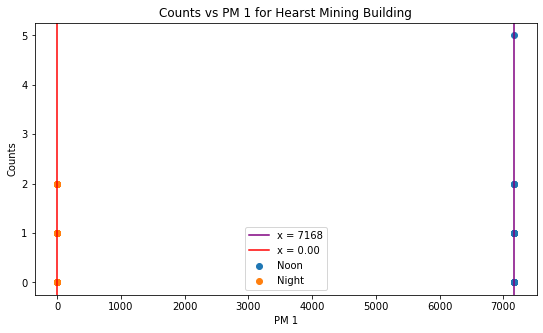

In [479]:
x = HearstNoonData["PM 1"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 7168, label = 'x = 7168', color = 'purple')
q = HearstNightData["PM 1"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 1"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 1"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

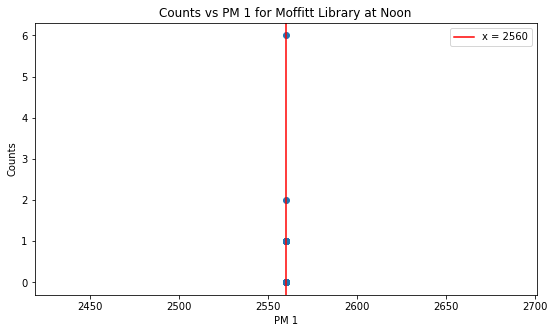

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:09:48   Log-Likelihood:                -121.18
No. Observations:                     118   AIC:                             244.4
Df Residuals:                         117   BIC:                             247.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 1        

In [482]:
x = MoffittNoonData["PM 1"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 2560, label = 'x = 2560', color = 'red')
plt.scatter(MoffittNoonData["PM 1"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

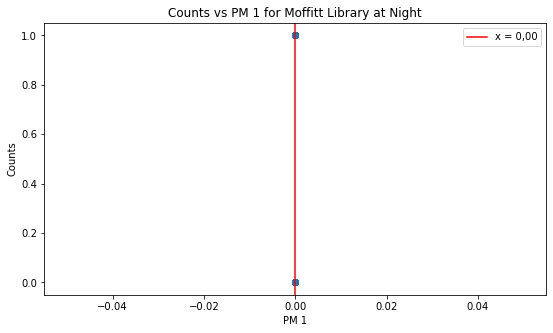

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:10:34   Log-Likelihood:                -49.328
No. Observations:                     118   AIC:                             100.7
Df Residuals:                         117   BIC:                             103.4
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [483]:
x = MoffittNightData["PM 1"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 1"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.title("Counts vs PM 1 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

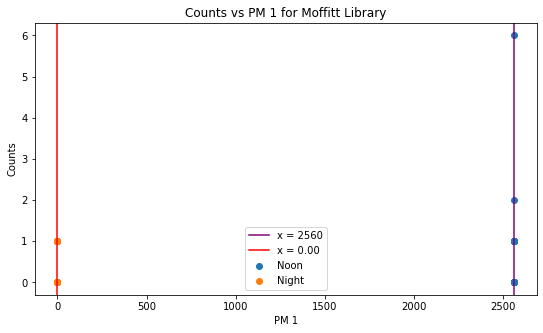

In [484]:
x = MoffittNoonData["PM 1"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 2560, label = 'x = 2560', color = 'purple')
q = MoffittNightData["PM 1"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 1"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 1"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

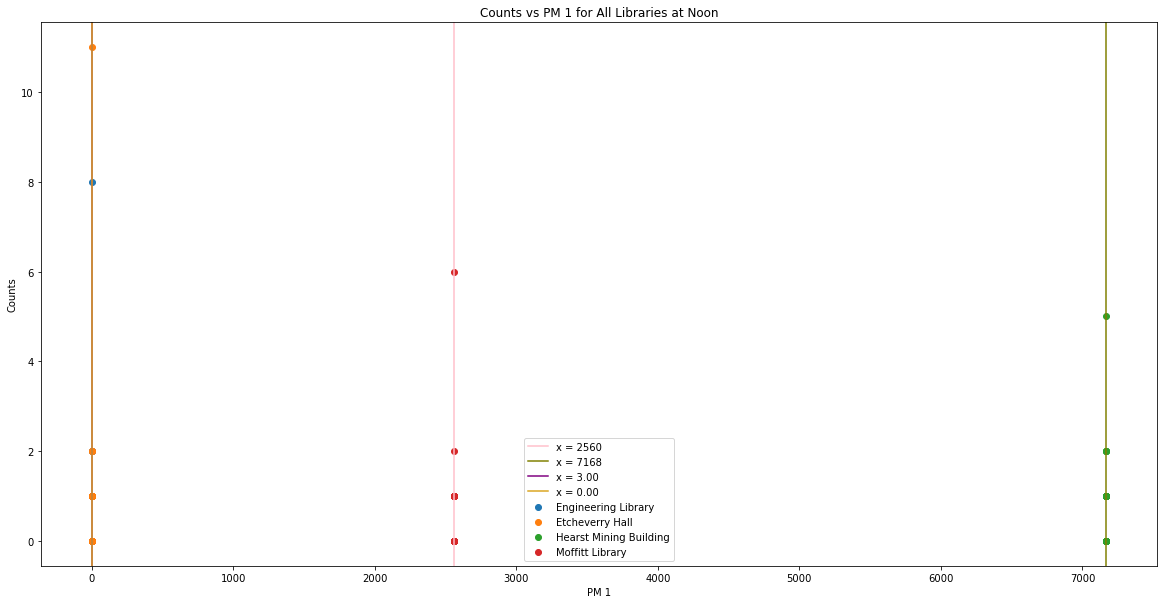

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3526
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.553
Time:                        06:20:59   Log-Likelihood:                -584.92
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.050      5.833      0.0

In [491]:
x = []
x.extend(EngNoonData["PM 1"])
x.extend(EtchNoonData["PM 1"])
x.extend(HearstNoonData["PM 1"])
x.extend(MoffittNoonData["PM 1"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 2560, label = 'x = 2560', color = 'pink')
plt.axvline(x = 7168, label = 'x = 7168', color = 'olive')
plt.axvline(x = 3, label = 'x = 3.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 1"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 1"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 1"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 1"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

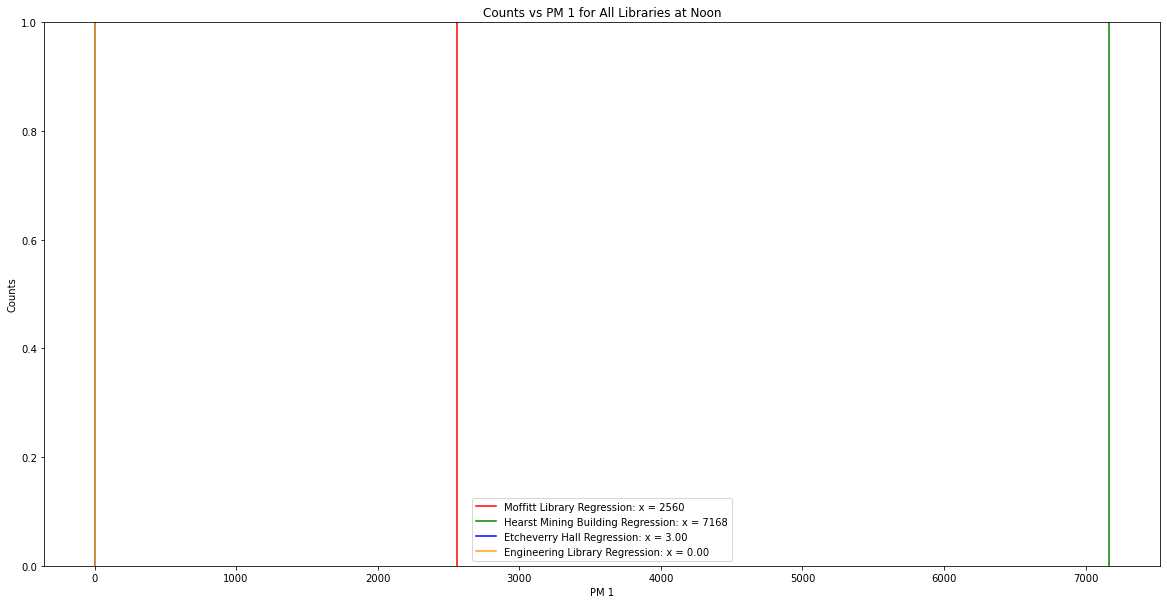

In [492]:
plt.axvline(x = 2560, label = 'Moffitt Library Regression: x = 2560', color = 'red')
plt.axvline(x = 7168, label = 'Hearst Mining Building Regression: x = 7168', color = 'green')
plt.axvline(x = 3, label = 'Etcheverry Hall Regression: x = 3.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

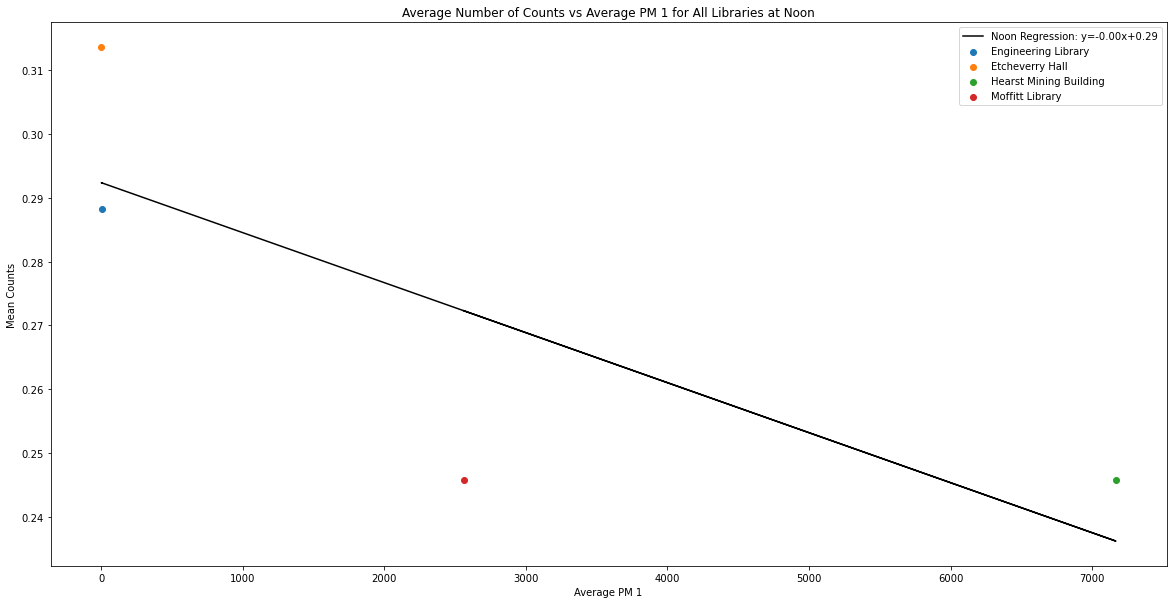

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     3.317
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.210
Time:                        06:23:13   Log-Likelihood:                 10.446
No. Observations:                   4   AIC:                            -16.89
Df Residuals:                       2   BIC:                            -18.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.016     17.892      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [493]:
x = [np.mean(EngNoonData["PM 1"]), np.mean(EtchNoonData["PM 1"]), np.mean(HearstNoonData["PM 1"]), np.mean(MoffittNoonData["PM 1"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 1"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 1"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 1"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 1"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 1 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

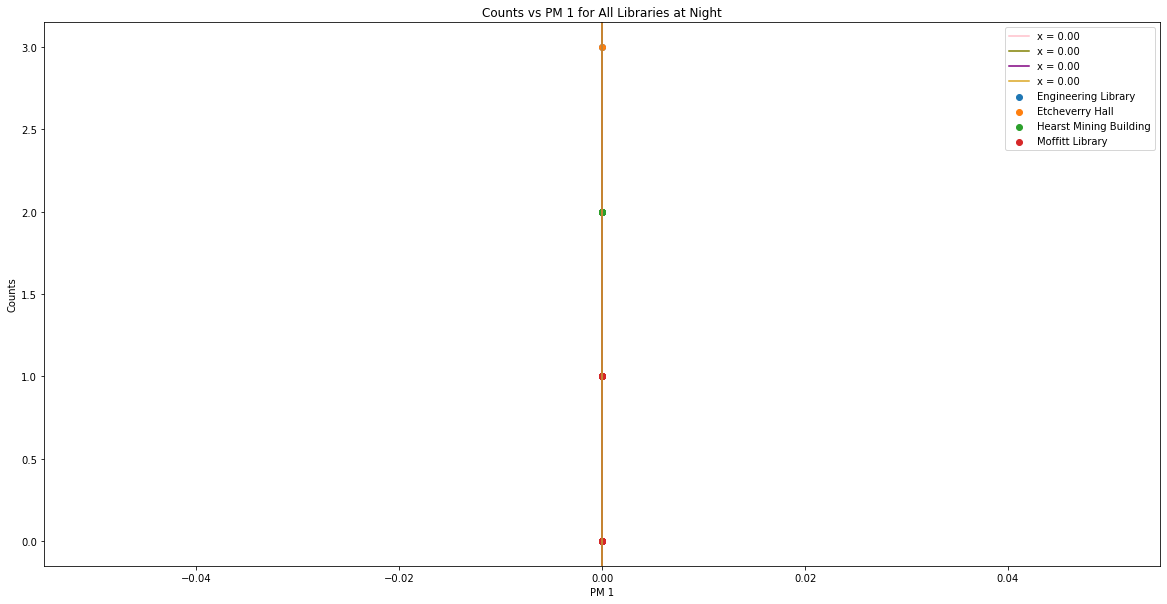

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.886
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0900
Time:                        06:26:03   Log-Likelihood:                -357.48
No. Observations:                 472   AIC:                             719.0
Df Residuals:                     470   BIC:                             727.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5150      0.456     -1.130      0.2

In [495]:
x = []
x.extend(EngNightData["Temperature"])
x.extend(EtchNightData["Temperature"])
x.extend(HearstNightData["Temperature"])
x.extend(MoffittNightData["Temperature"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 1"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 1"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 1"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 1"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

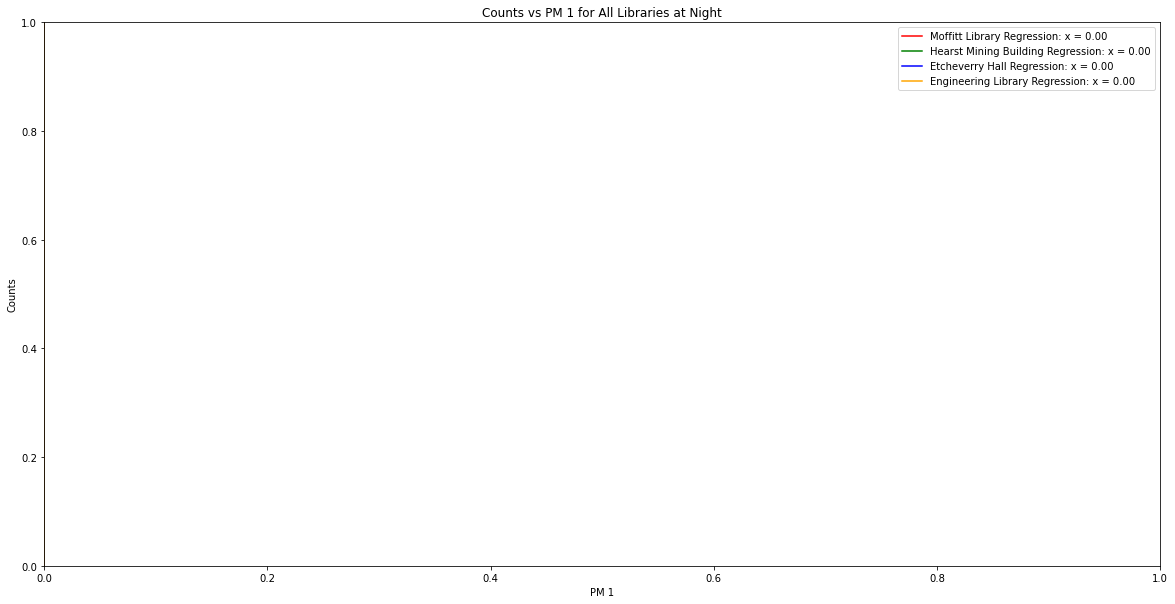

In [497]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 1 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

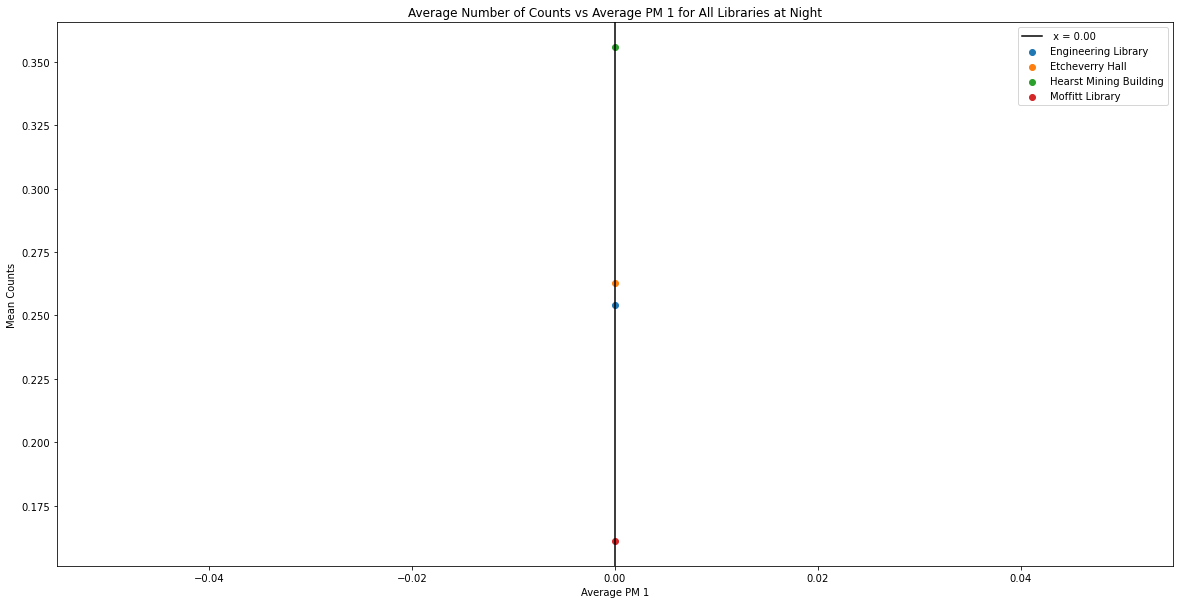

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        06:29:58   Log-Likelihood:                 5.0201
No. Observations:                   4   AIC:                            -8.040
Df Residuals:                       3   BIC:                            -8.654
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.040      6.490      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [500]:
x = [np.mean(EngNightData["PM 1"]), np.mean(EtchNightData["PM 1"]), np.mean(HearstNightData["PM 1"]), np.mean(MoffittNightData["PM 1"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 1"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 1"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 1"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 1"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 1 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 2.5) Data for Both Noon and Night Times at Each Location

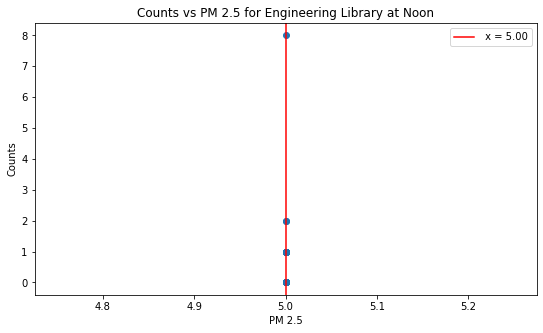

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:33:49   Log-Likelihood:                -147.53
No. Observations:                     118   AIC:                             297.1
Df Residuals:                         117   BIC:                             299.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [502]:
x = EngNoonData["PM 2.5"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 5, label = ' x = 5.00', color = 'red')
plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

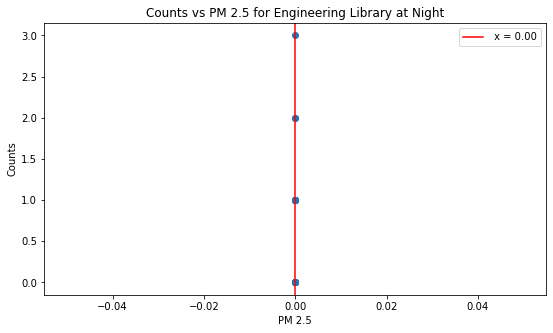

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:35:05   Log-Likelihood:                -91.126
No. Observations:                     118   AIC:                             184.3
Df Residuals:                         117   BIC:                             187.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [503]:
x = EngNightData["PM 2.5"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')              
plt.title("Counts vs PM 2.5 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

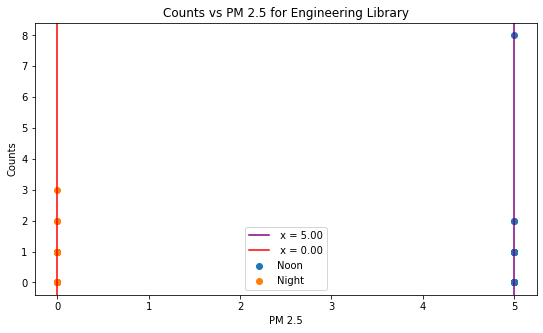

In [504]:
x = EngNoonData["PM 2.5"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 5, label = ' x = 5.00', color = 'purple')
q = EngNightData["PM 2.5"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

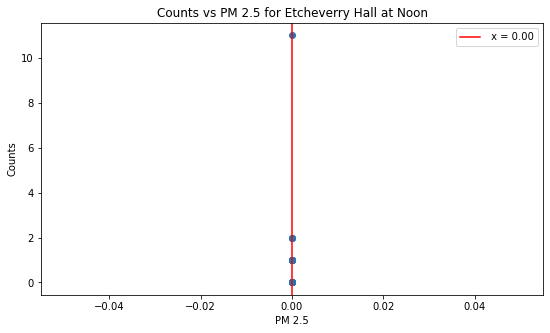

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:38:34   Log-Likelihood:                -178.11
No. Observations:                     118   AIC:                             358.2
Df Residuals:                         117   BIC:                             361.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [505]:
x = EtchNoonData["PM 2.5"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

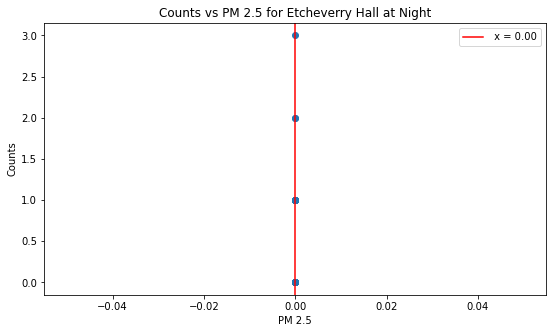

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:39:23   Log-Likelihood:                -92.000
No. Observations:                     118   AIC:                             186.0
Df Residuals:                         117   BIC:                             188.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [506]:
x = EtchNightData["PM 2.5"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')              
plt.title("Counts vs PM 2.5 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

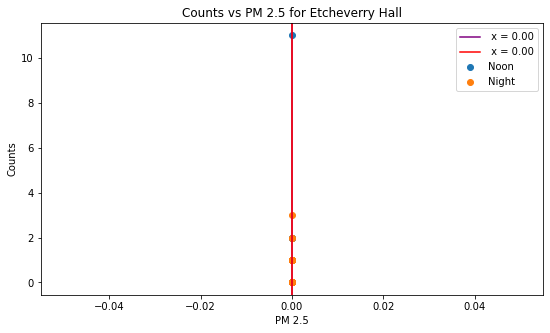

In [507]:
x = EtchNoonData["PM 2.5"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0, label = ' x = 0.00', color = 'purple')
q = EtchNightData["PM 2.5"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

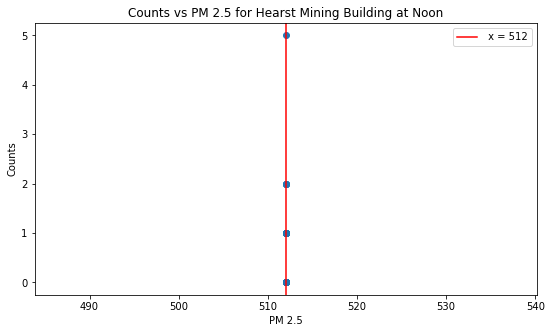

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:42:02   Log-Likelihood:                -116.62
No. Observations:                     118   AIC:                             235.2
Df Residuals:                         117   BIC:                             238.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [508]:
x = HearstNoonData["PM 2.5"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 512, label = ' x = 512', color = 'red')
plt.scatter(HearstNoonData["PM 2.5"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

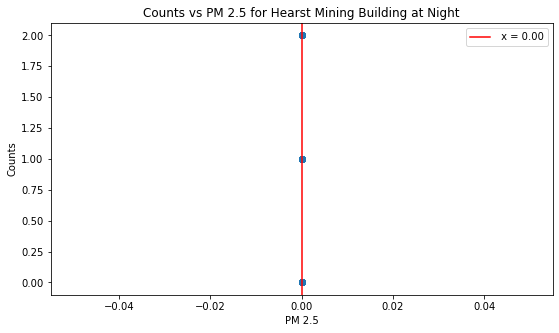

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:42:47   Log-Likelihood:                -107.94
No. Observations:                     118   AIC:                             217.9
Df Residuals:                         117   BIC:                             220.7
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [509]:
x = HearstNightData["PM 2.5"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 2.5"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

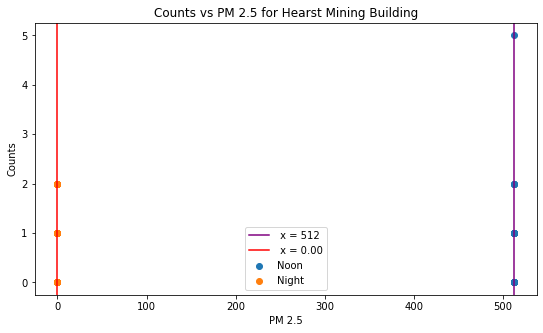

In [510]:
x = HearstNoonData["PM 2.5"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 512, label = ' x = 512', color = 'purple')
q = HearstNightData["PM 2.5"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 2.5"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 2.5"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

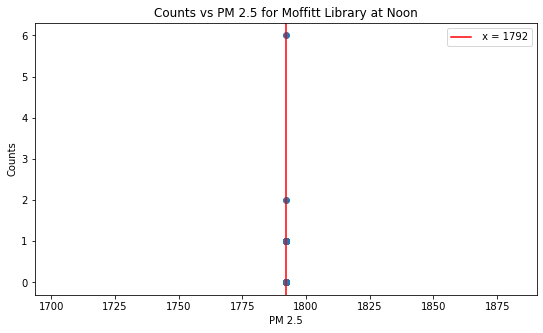

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:45:16   Log-Likelihood:                -121.18
No. Observations:                     118   AIC:                             244.4
Df Residuals:                         117   BIC:                             247.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 2.5      

In [511]:
x = MoffittNoonData["PM 2.5"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 1792, label = ' x = 1792', color = 'red')
plt.scatter(MoffittNoonData["PM 2.5"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

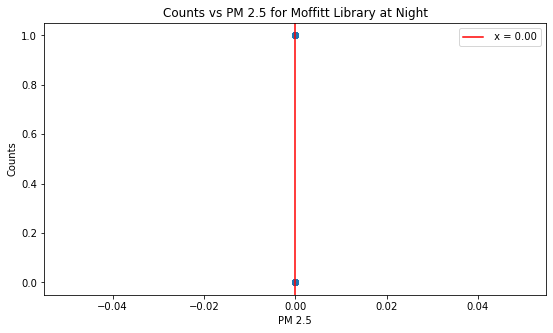

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            06:46:16   Log-Likelihood:                -49.328
No. Observations:                     118   AIC:                             100.7
Df Residuals:                         117   BIC:                             103.4
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [512]:
x = MoffittNightData["PM 2.5"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 2.5"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.title("Counts vs PM 2.5 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

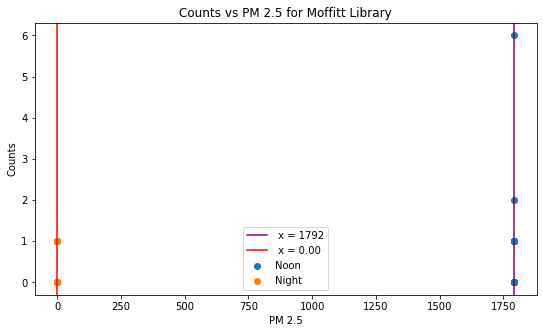

In [513]:
x = MoffittNoonData["PM 2.5"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 1792, label = ' x = 1792', color = 'purple')
q = MoffittNightData["PM 2.5"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0, label = ' x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 2.5"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 2.5"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

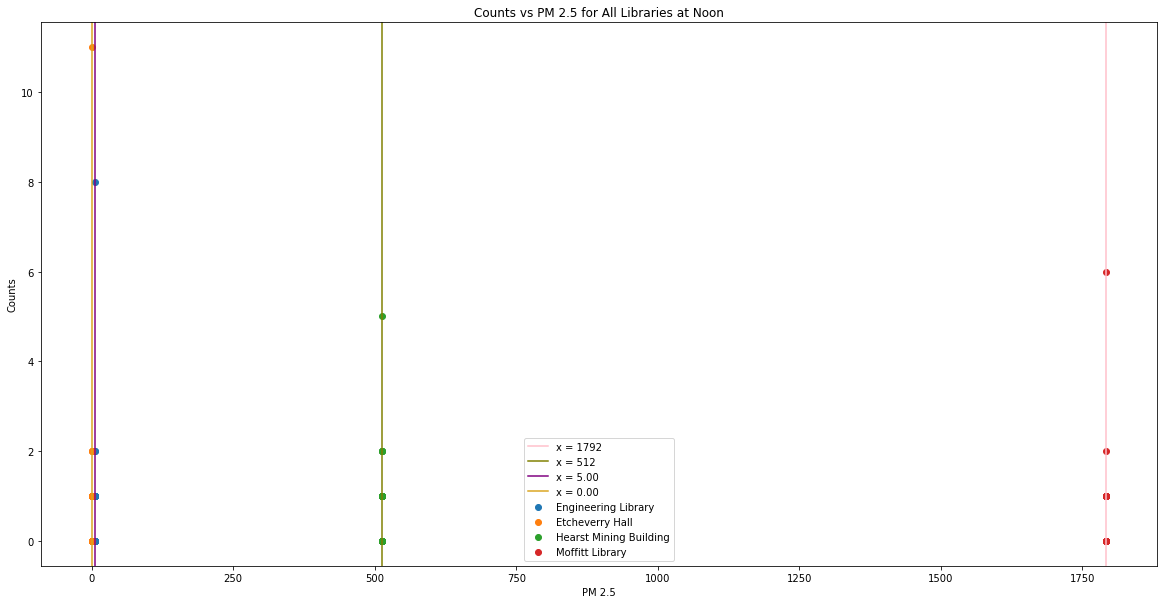

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3159
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.574
Time:                        07:05:21   Log-Likelihood:                -584.94
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2904      0.049      5.915      0.0

In [524]:
x = []
x.extend(EngNoonData["PM 2.5"])
x.extend(EtchNoonData["PM 2.5"])
x.extend(HearstNoonData["PM 2.5"])
x.extend(MoffittNoonData["PM 2.5"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 1792, label = 'x = 1792', color = 'pink')
plt.axvline(x = 512, label = 'x = 512', color = 'olive')
plt.axvline(x = 5, label = 'x = 5.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 2.5"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 2.5"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 2.5"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 2.5"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

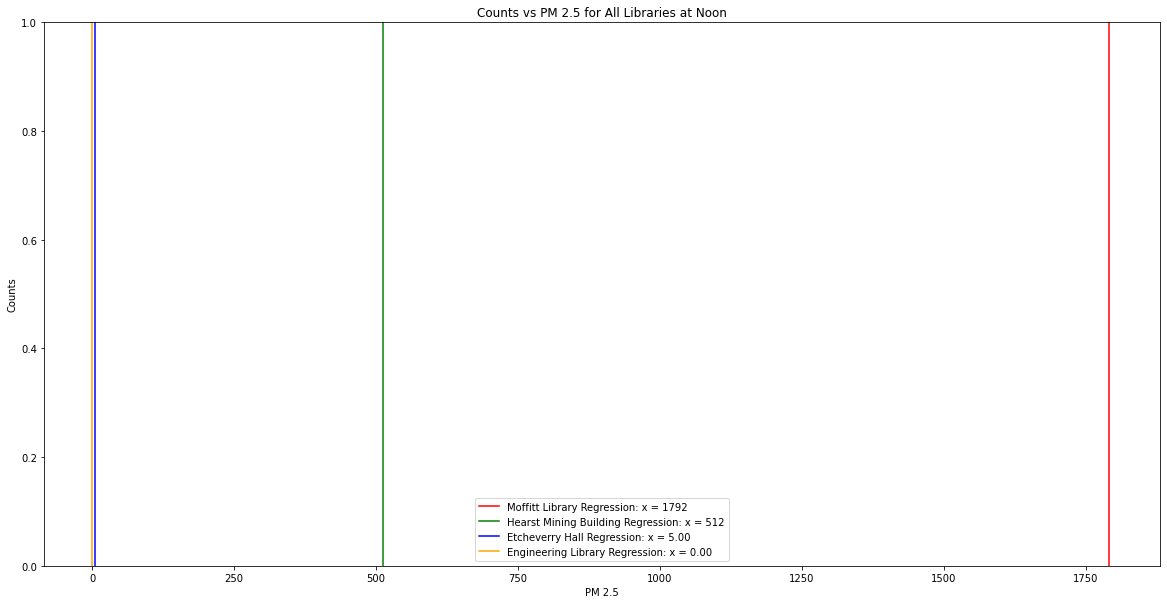

In [525]:
plt.axvline(x = 1792, label = 'Moffitt Library Regression: x = 1792', color = 'red')
plt.axvline(x = 512, label = 'Hearst Mining Building Regression: x = 512', color = 'green')
plt.axvline(x = 5, label = 'Etcheverry Hall Regression: x = 5.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

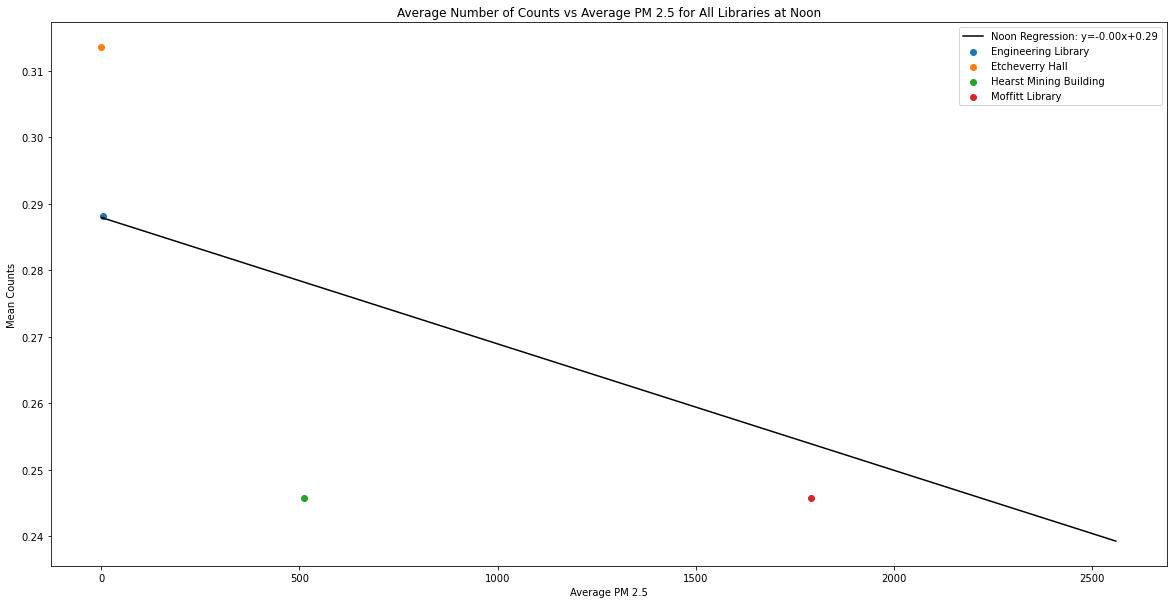

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1.835
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.308
Time:                        06:54:47   Log-Likelihood:                 9.7918
No. Observations:                   4   AIC:                            -15.58
Df Residuals:                       2   BIC:                            -16.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2879      0.018     15.722      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [517]:
x = [np.mean(EngNoonData["PM 2.5"]), np.mean(EtchNoonData["PM 2.5"]), np.mean(HearstNoonData["PM 2.5"]), np.mean(MoffittNoonData["PM 1"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 2.5"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 2.5"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 2.5"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 2.5"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 2.5')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 2.5 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

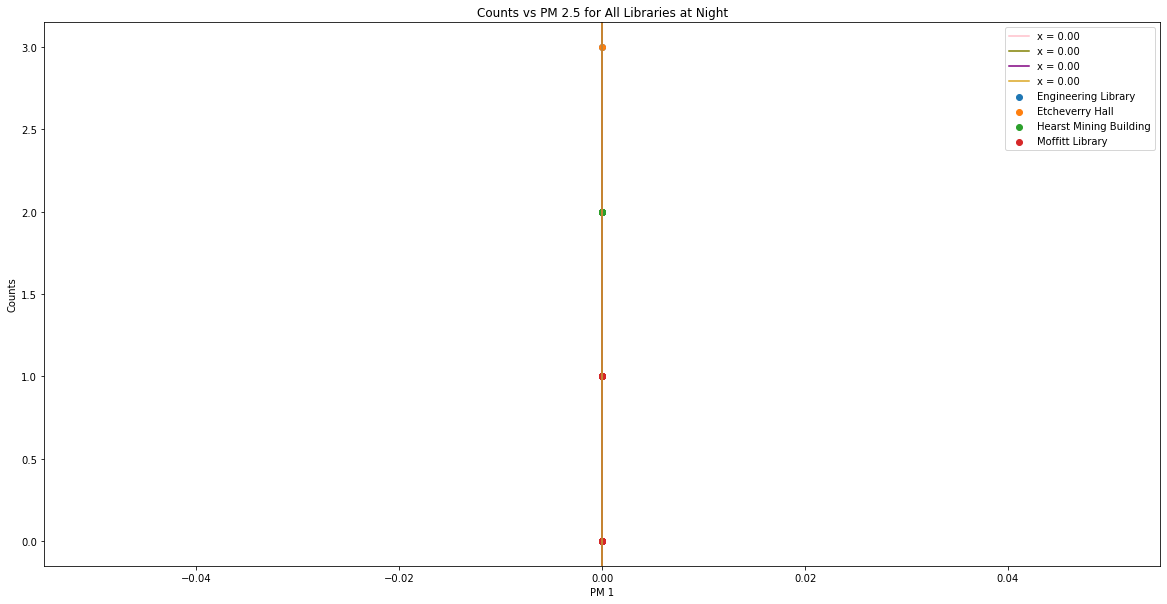

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        06:59:22   Log-Likelihood:                -358.93
No. Observations:                 472   AIC:                             719.9
Df Residuals:                     471   BIC:                             724.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.024     10.837      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [521]:
x = []
x.extend(EngNightData["PM 2.5"])
x.extend(EtchNightData["PM 2.5"])
x.extend(HearstNightData["PM 2.5"])
x.extend(MoffittNightData["PM 2.5"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 2.5"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 2.5"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 2.5"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 2.5"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 1')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

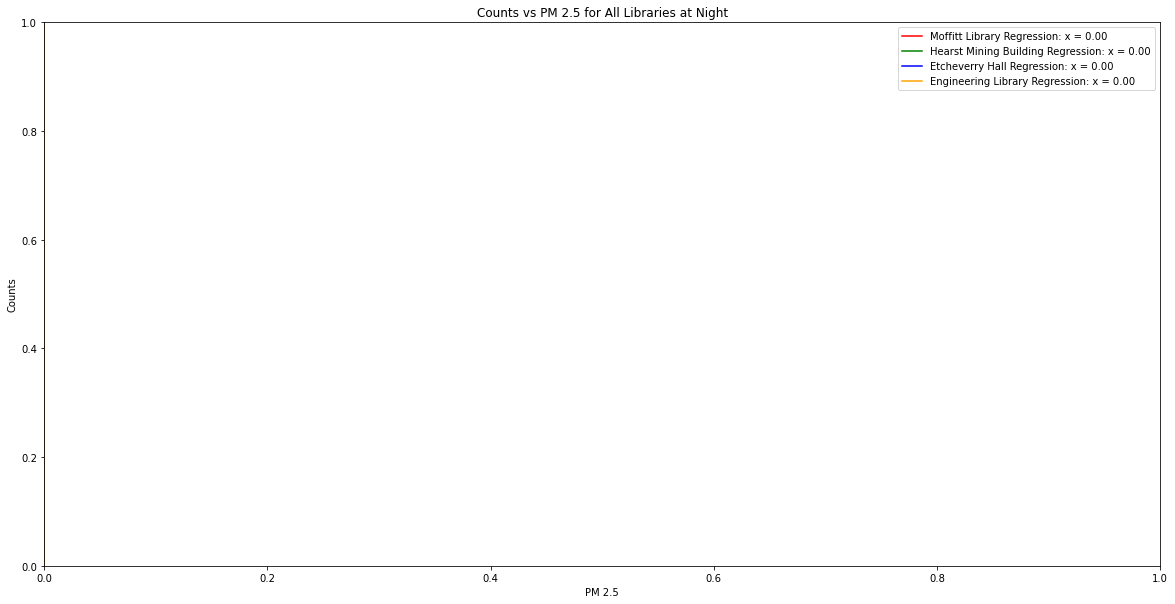

In [522]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 2.5')
plt.legend()                  
plt.title("Counts vs PM 2.5 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

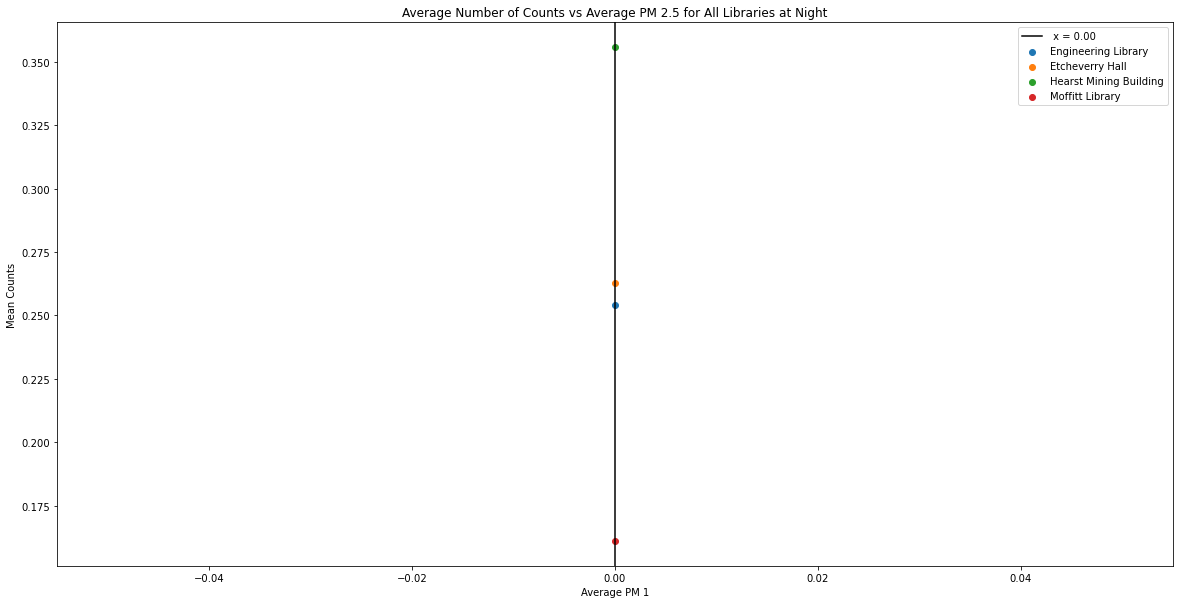

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        07:00:27   Log-Likelihood:                 5.0201
No. Observations:                   4   AIC:                            -8.040
Df Residuals:                       3   BIC:                            -8.654
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.040      6.490      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [523]:
x = [np.mean(EngNightData["PM 2.5"]), np.mean(EtchNightData["PM 2.5"]), np.mean(HearstNightData["PM 2.5"]), np.mean(MoffittNightData["PM 2.5"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 2.5"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 2.5"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 2.5"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 2.5"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 1')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 2.5 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

### Plot Radiation vs Air Quality (PM 10) Data for Both Noon and Night Times at Each Location

#### Engineering Library

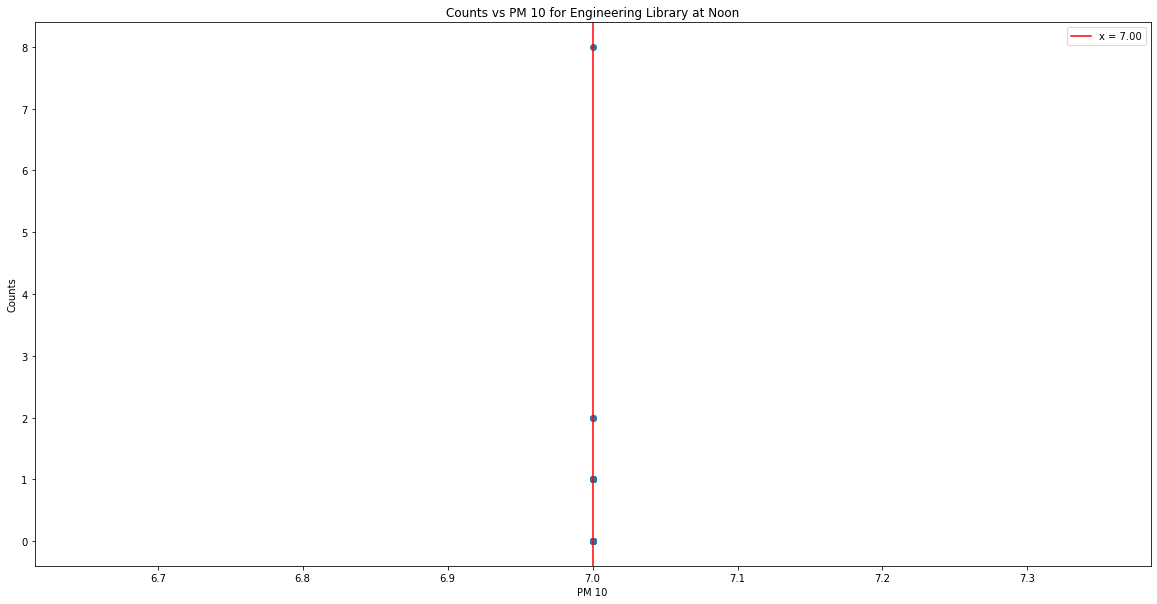

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:06:54   Log-Likelihood:                -147.53
No. Observations:                     118   AIC:                             297.1
Df Residuals:                         117   BIC:                             299.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 10       

In [526]:
x = EngNoonData["PM 10"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, 0.096*x, label = 'y=0.096x+0.000'.format(m,b), color = 'red')
plt.axvline(x = 7.0, label = 'x = 7.00', color = 'red')
plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Engineering Library at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

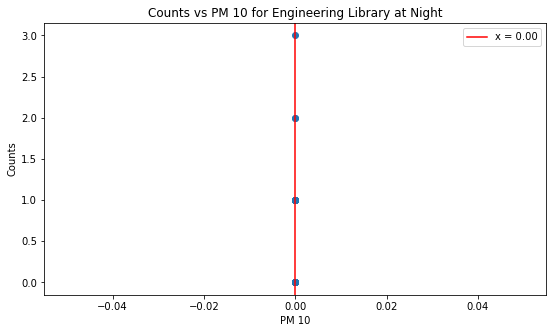

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:07:26   Log-Likelihood:                -91.126
No. Observations:                     118   AIC:                             184.3
Df Residuals:                         117   BIC:                             187.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [527]:
x = EngNightData["PM 10"]
y = EngNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')              
plt.title("Counts vs PM 10 for Engineering Library at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

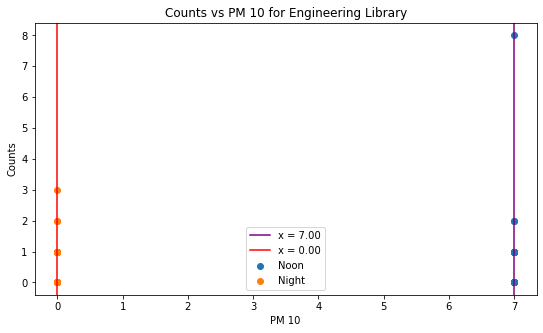

In [528]:
x = EngNoonData["PM 10"]
y = EngNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 7.0, label = 'x = 7.00', color = 'purple')
q = EngNightData["PM 10"]
r = EngNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Engineering Library")  
plt.rcParams['figure.figsize'] = [9,5]
plt.legend()
plt.show()

#### Etcheverry Hall

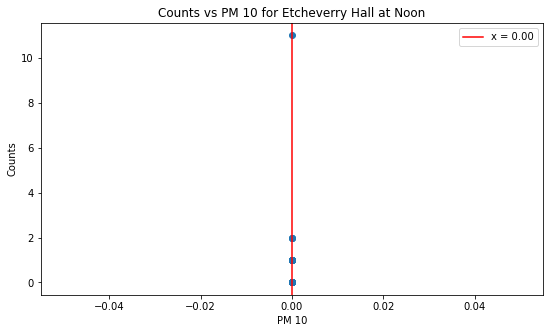

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:09:03   Log-Likelihood:                -178.11
No. Observations:                     118   AIC:                             358.2
Df Residuals:                         117   BIC:                             361.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [529]:
x = EtchNoonData["PM 10"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Etcheverry Hall at Noon")          
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

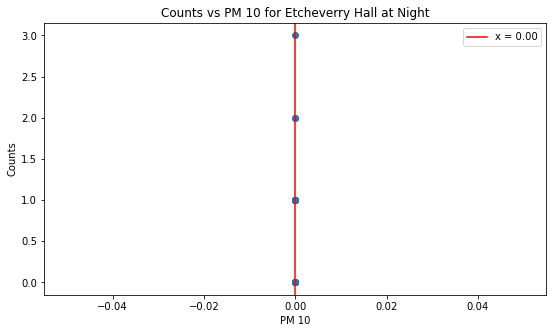

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:09:43   Log-Likelihood:                -92.000
No. Observations:                     118   AIC:                             186.0
Df Residuals:                         117   BIC:                             188.8
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [530]:
x = EtchNightData["PM 10"]
y = EtchNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')              
plt.title("Counts vs PM 10 for Etcheverry Hall at Night")    
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

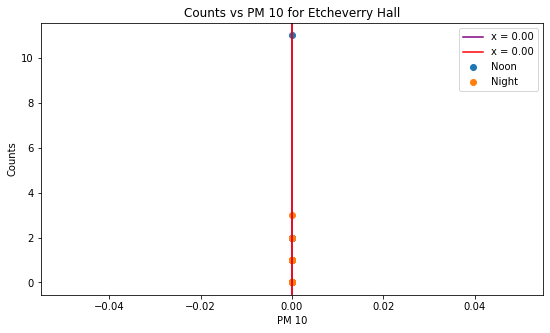

In [531]:
x = EtchNoonData["PM 10"]
y = EtchNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'purple')
q = EtchNightData["PM 10"]
r = EtchNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i), color = 'red')
plt.axvline(x = 0.0, label = 'x = 0.00', color = 'red')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"], label = "Noon")
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Etcheverry Hall")      
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Hearst Mining Building

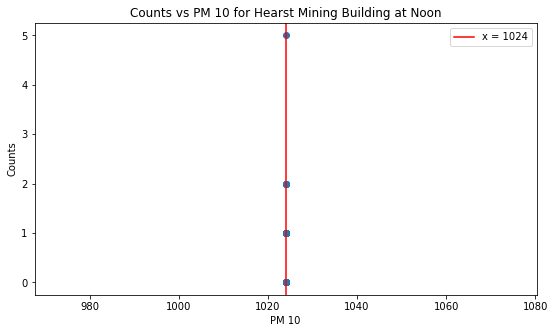

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:11:57   Log-Likelihood:                -116.62
No. Observations:                     118   AIC:                             235.2
Df Residuals:                         117   BIC:                             238.0
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM 10       

In [532]:
x = HearstNoonData["PM 10"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 1024, label = 'x = 1024', color = 'red')
plt.scatter(HearstNoonData["PM 10"], HearstNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Hearst Mining Building at Noon") 
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

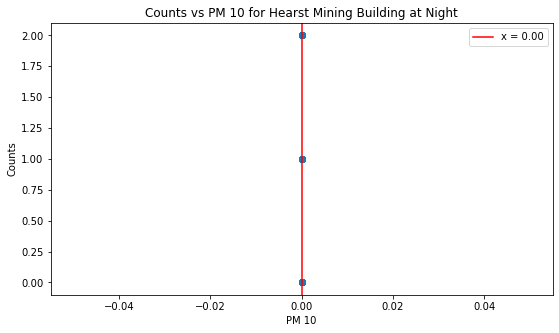

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                      -0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:12:25   Log-Likelihood:                -107.94
No. Observations:                     118   AIC:                             217.9
Df Residuals:                         117   BIC:                             220.7
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [533]:
x = HearstNightData["PM 10"]
y = HearstNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNightData["PM 10"], HearstNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Hearst Mining Building at Night")
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

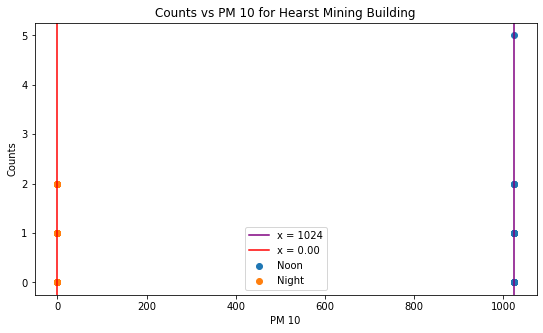

In [534]:
x = HearstNoonData["PM 10"]
y = HearstNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 1024, label = 'x = 1024', color = 'purple')
q = HearstNightData["PM 10"]
r = HearstNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(HearstNoonData["PM 10"],HearstNoonData["Counts within Interval"], label = "Noon")
plt.scatter(HearstNightData["PM 10"],HearstNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Hearst Mining Building")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### Moffitt Library

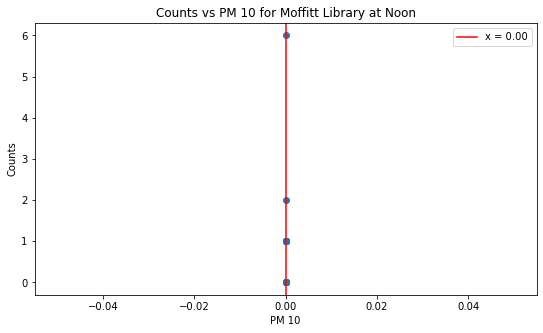

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:14:33   Log-Likelihood:                -121.18
No. Observations:                     118   AIC:                             244.4
Df Residuals:                         117   BIC:                             247.1
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [535]:
x = MoffittNoonData["PM 10"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 10"], MoffittNoonData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Moffitt Library at Noon")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

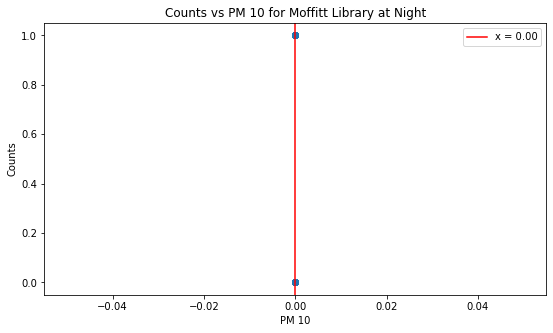

                              OLS Regression Results                              
Dep. Variable:     Counts within Interval   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                            07:14:54   Log-Likelihood:                -49.328
No. Observations:                     118   AIC:                             100.7
Df Residuals:                         117   BIC:                             103.4
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [536]:
x = MoffittNightData["PM 10"]
y = MoffittNightData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'y={:.2f}x+{:.2f}'.format(m,b), color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNightData["PM 10"], MoffittNightData["Counts within Interval"])
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.title("Counts vs PM 10 for Moffitt Library at Night")           
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

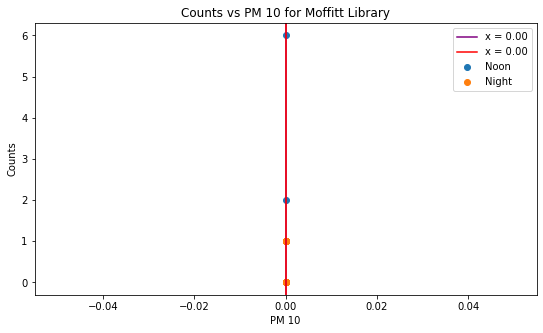

In [537]:
x = MoffittNoonData["PM 10"]
y = MoffittNoonData["Counts within Interval"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
q = MoffittNightData["PM 10"]
r = MoffittNightData["Counts within Interval"]
#s, i = np.polyfit(q, r, 1)
#plt.plot(q, s*q+i, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(s,i),color = 'red')
plt.axvline(x = 0.00, label = 'x = 0.00', color = 'red')
plt.scatter(MoffittNoonData["PM 10"],MoffittNoonData["Counts within Interval"], label = "Noon")
plt.scatter(MoffittNightData["PM 10"],MoffittNightData["Counts within Interval"], label = "Night")
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for Moffitt Library")  
plt.rcParams['figure.figsize'] = [9, 5]
plt.legend()
plt.show()

#### All Buildings at Noon

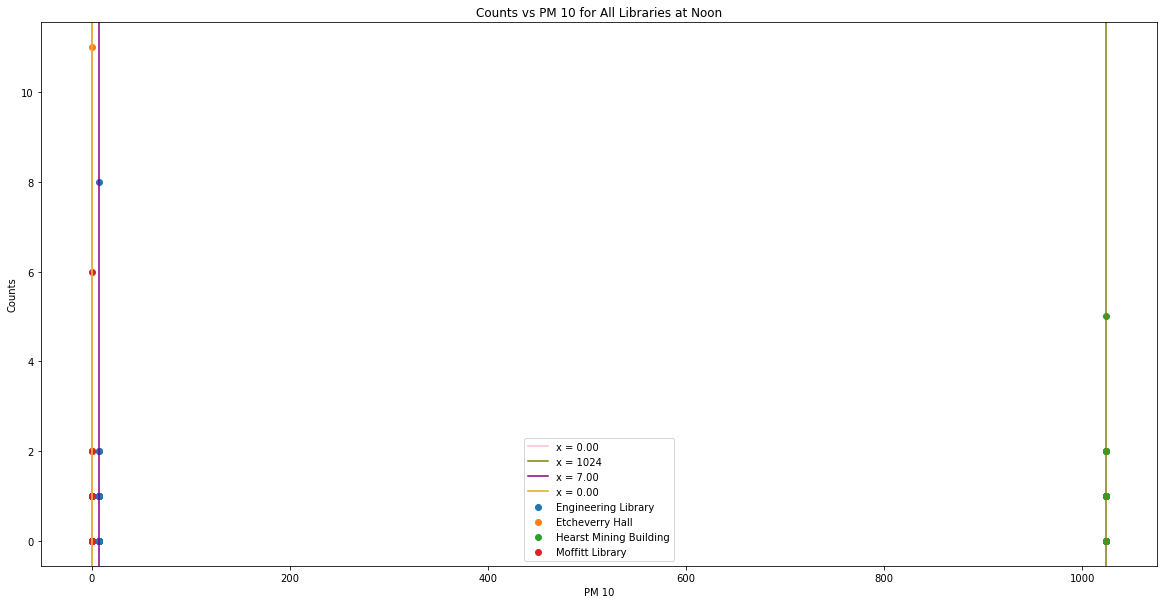

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1697
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.681
Time:                        07:17:12   Log-Likelihood:                -585.01
No. Observations:                 472   AIC:                             1174.
Df Residuals:                     470   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.045      6.334      0.0

In [539]:
x = []
x.extend(EngNoonData["PM 10"])
x.extend(EtchNoonData["PM 10"])
x.extend(HearstNoonData["PM 10"])
x.extend(MoffittNoonData["PM 10"])
y = []
y.extend(EngNoonData["Counts within Interval"])
y.extend(EtchNoonData["Counts within Interval"])
y.extend(HearstNoonData["Counts within Interval"])
y.extend(MoffittNoonData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 1024, label = 'x = 1024', color = 'olive')
plt.axvline(x = 7, label = 'x = 7.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNoonData["PM 10"],EngNoonData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNoonData["PM 10"],EtchNoonData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNoonData["PM 10"],HearstNoonData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNoonData["PM 10"],MoffittNoonData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

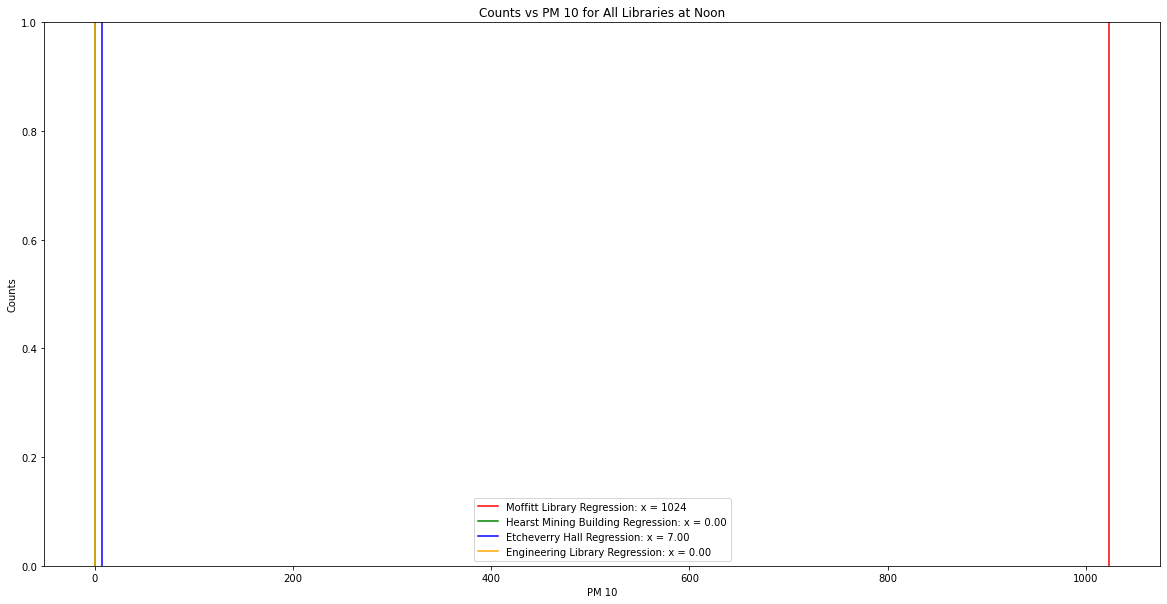

In [540]:
plt.axvline(x = 1024, label = 'Moffitt Library Regression: x = 1024', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 7, label = 'Etcheverry Hall Regression: x = 7.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

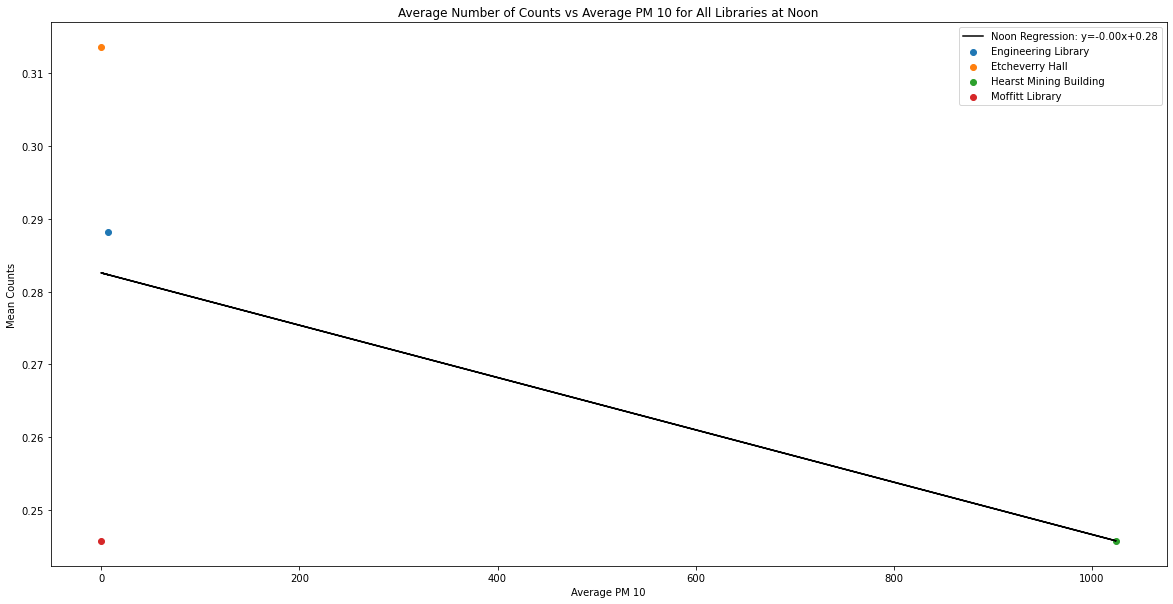

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.8587
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.452
Time:                        07:18:48   Log-Likelihood:                 9.2044
No. Observations:                   4   AIC:                            -14.41
Df Residuals:                       2   BIC:                            -15.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.020     14.248      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [541]:
x = [np.mean(EngNoonData["PM 10"]), np.mean(EtchNoonData["PM 10"]), np.mean(HearstNoonData["PM 10"]), np.mean(MoffittNoonData["PM 10"])]
y = [np.mean(EngNoonData["Counts within Interval"]), np.mean(EtchNoonData["Counts within Interval"]), np.mean(HearstNoonData["Counts within Interval"]), np.mean(MoffittNoonData["Counts within Interval"])]
#print(x)
#print(y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.asarray(x)+b, label = 'Noon Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNoonData["PM 10"]),np.mean(EngNoonData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNoonData["PM 10"]),np.mean(EtchNoonData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNoonData["PM 10"]),np.mean(HearstNoonData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNoonData["PM 10"]),np.mean(MoffittNoonData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 10')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 10 for All Libraries at Noon")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

#### All Buildings at Night

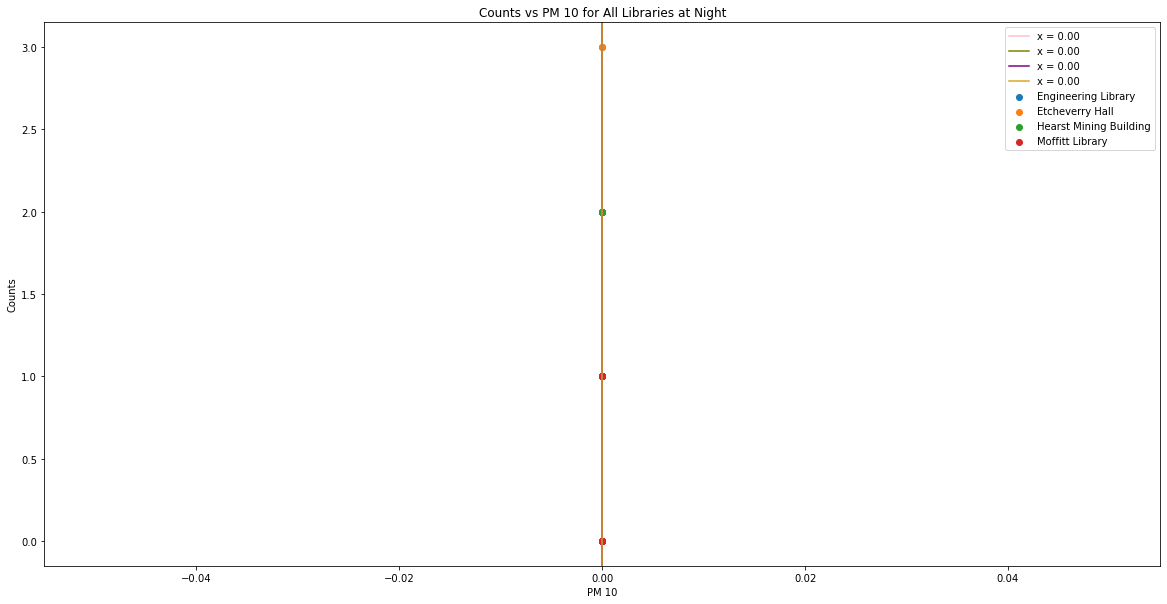

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        07:19:57   Log-Likelihood:                -358.93
No. Observations:                 472   AIC:                             719.9
Df Residuals:                     471   BIC:                             724.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.024     10.837      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [542]:
x = []
x.extend(EngNightData["PM 10"])
x.extend(EtchNightData["PM 10"])
x.extend(HearstNightData["PM 10"])
x.extend(MoffittNightData["PM 10"])
y = []
y.extend(EngNightData["Counts within Interval"])
y.extend(EtchNightData["Counts within Interval"])
y.extend(HearstNightData["Counts within Interval"])
y.extend(MoffittNightData["Counts within Interval"])
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = 'x = 0.00', color = 'pink')
plt.axvline(x = 0, label = 'x = 0.00', color = 'olive')
plt.axvline(x = 0, label = 'x = 0.00', color = 'purple')
plt.axvline(x = 0, label = 'x = 0.00', color = 'goldenrod')

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(EngNightData["PM 10"],EngNightData["Counts within Interval"], label = 'Engineering Library')
plt.scatter(EtchNightData["PM 10"],EtchNightData["Counts within Interval"], label = 'Etcheverry Hall')
plt.scatter(HearstNightData["PM 10"],HearstNightData["Counts within Interval"], label = 'Hearst Mining Building')
plt.scatter(MoffittNightData["PM 10"],MoffittNightData["Counts within Interval"], label = 'Moffitt Library')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())

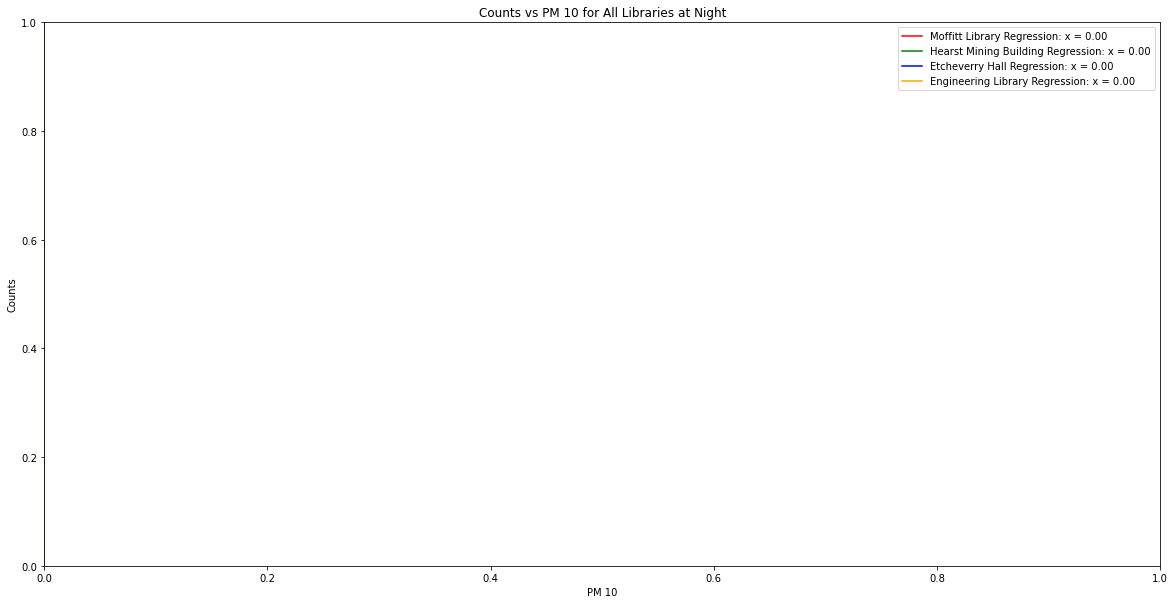

In [543]:
plt.axvline(x = 0, label = 'Moffitt Library Regression: x = 0.00', color = 'red')
plt.axvline(x = 0, label = 'Hearst Mining Building Regression: x = 0.00', color = 'green')
plt.axvline(x = 0, label = 'Etcheverry Hall Regression: x = 0.00', color = 'blue')
plt.axvline(x = 0, label = 'Engineering Library Regression: x = 0.00', color = 'orange')
plt.ylabel('Counts') 
plt.xlabel('PM 10')
plt.legend()                  
plt.title("Counts vs PM 10 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

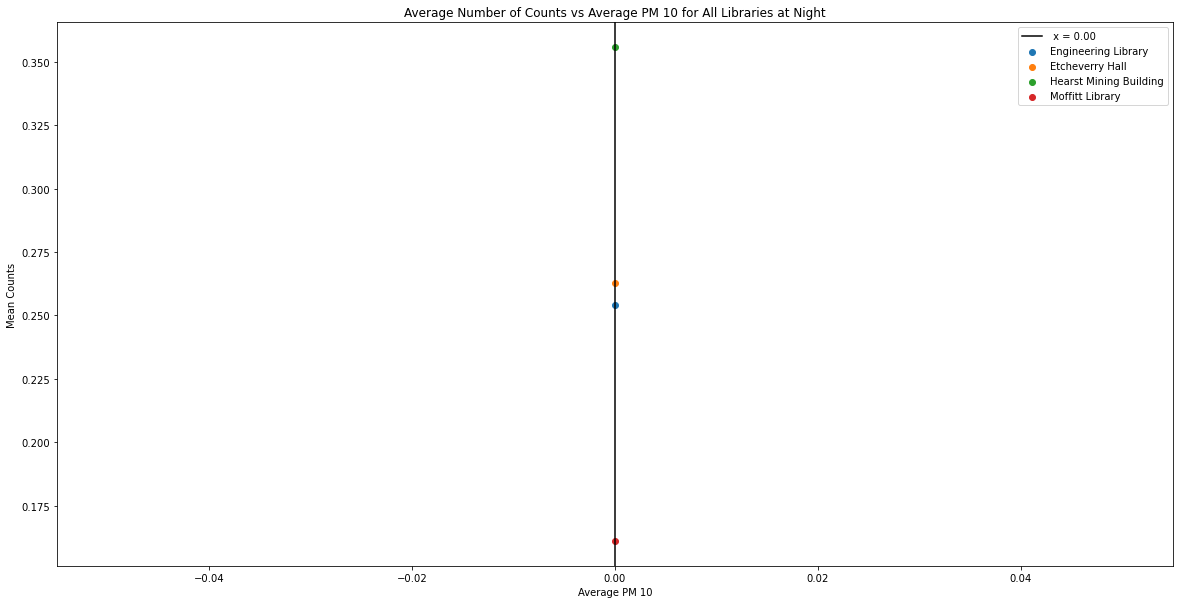

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                nan
Time:                        07:20:56   Log-Likelihood:                 5.0201
No. Observations:                   4   AIC:                            -8.040
Df Residuals:                       3   BIC:                            -8.654
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.040      6.490      0.0

C:\Users\saais\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\saais\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [544]:
x = [np.mean(EngNightData["PM 10"]), np.mean(EtchNightData["PM 10"]), np.mean(HearstNightData["PM 10"]), np.mean(MoffittNightData["PM 10"])]
y = [np.mean(EngNightData["Counts within Interval"]), np.mean(EtchNightData["Counts within Interval"]), np.mean(HearstNightData["Counts within Interval"]), np.mean(MoffittNightData["Counts within Interval"])]
#print(x)
#print(y)
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*np.asarray(x)+b, label = 'Night Regression: y={:.2f}x+{:.2f}'.format(m,b), color = 'black')
plt.axvline(x = 0, label = ' x = 0.00', color = 'black')
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

plt.scatter(np.mean(EngNightData["PM 10"]),np.mean(EngNightData["Counts within Interval"]), label = 'Engineering Library')
plt.scatter(np.mean(EtchNightData["PM 10"]),np.mean(EtchNightData["Counts within Interval"]), label = 'Etcheverry Hall')
plt.scatter(np.mean(HearstNightData["PM 10"]),np.mean(HearstNightData["Counts within Interval"]), label = 'Hearst Mining Building')
plt.scatter(np.mean(MoffittNightData["PM 10"]),np.mean(MoffittNightData["Counts within Interval"]), label = 'Moffitt Library')
plt.ylabel('Mean Counts') 
plt.xlabel('Average PM 10')
plt.legend()                  
plt.title("Average Number of Counts vs Average PM 10 for All Libraries at Night")    
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()
plt.show()

print(res.summary())